<!-- PS-S5.E01 -->

<div style="font-family: 'Poppins'; font-weight: bold; letter-spacing: 0px; color: #FFFFFF; font-size: 500%; text-align: center; padding: 15px; background: #0A0F29; border: 8px solid #00FFFF; border-radius: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5);">
    Sales Forecasting With LLM,LGBM, LR <br>
</div>

In [1]:
# --------------------------------------------------------
# Options
# --------------------------------------------------------

RUN_LLM = True
BASE_LLM = 'gpt-4o-2024-05-13'
ADVANCED_LLM = 'o1-preview'
SELECTED_LLM = ADVANCED_LLM

In [2]:
#https://unsplash.com/fr/photos/femme-assise-et-utilisant-macbook-NdO2zVQ7cXE?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash
!cp /kaggle/input/ps-s5-e01-wg/mindspace-studio-NdO2zVQ7cXE-unsplash_petite.jpg /kaggle/working/mindspace-studio-NdO2zVQ7cXE-unsplash_petite.jpg

<div style="text-align: center;">
    <img src="mindspace-studio-NdO2zVQ7cXE-unsplash_petite.jpg" alt="Centered Image">
</div>

Photo de <a href="https://unsplash.com/fr/@mindspacestudio?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Mindspace Studio</a> sur <a href="https://unsplash.com/fr/photos/femme-assise-et-utilisant-macbook-NdO2zVQ7cXE?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Introduction</div>

This is my master notebook for the competition, which I will update regularly with links to the different models I will be training.

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Challenge Overview 📚</div>

- **Welcome to Forecasting Sticker Sales!**
- **Predict sticker sales globally**
- **Use synthetic, real-world-like data**
- **Evaluate with Mean Absolute Percentage Error**
- **Includes multiple countries and stores**
- **Features seasonality and holiday effects**
- **Date, country, store, item details**
- **Reflects real sales patterns**

summary generated by o1-mini

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Dataset Description 📊 </div>

- **Total Records:** 230,130 rows, 6 columns.  
- **Columns:**  
  - `id`: Unique identifier for each record.  
  - `date`: Date of the sales record (starting from January 1, 2010).  
  - `country`: Indicates the region of the sale (e.g., Canada).  
  - `store`: Name of the store where the product was sold.  
  - `product`: Name of the product sold.  
  - `num_sold`: Number of units sold (numeric).  
- **Purpose:** Tracks daily product sales across stores and countries.  
- **Granularity:** Data contains sales per product per store per day.  

summary generated by 4o

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Evaluation Metric 📈 </div>

## Understanding the Mean Absolute Percentage Error (MAPE)

- **Definition:**  
  MAPE measures the average magnitude of errors in predictions, expressed as a percentage.

- **Calculation:**  
  $$
  \text{MAPE} = \frac{100\%}{n} \sum_{t=1}^{n} \left| \frac{A_t - F_t}{A_t} \right|
  $$
  - At A_t : Actual value
  - Ft F_t : Forecasted value
  - n n : Number of predictions

- **Interpretation:**  
  Lower MAPE values indicate more accurate predictions. For example, a MAPE of 5% means the predictions are, on average, within 5% of the actual values.

- **Advantages:**  
  - Easy to understand and interpret
  - Scale-independent, allowing comparison across different datasets

- **Limitations:**  
  - Undefined when actual values are zero
  - Can be biased towards predictions that under-predict

## Risk of Overfitting with MAPE in Kaggle Competitions

Using MAPE as the evaluation metric can introduce certain risks related to overfitting:

- **Focus on Percentage Errors:**  
  Participants might optimize their models to minimize percentage errors specifically, potentially neglecting other aspects of model performance.

- **Handling of Outliers:**  
  MAPE can disproportionately penalize predictions when actual values are low, leading models to overfit these instances to achieve lower error rates.

- **Bias Towards Certain Predictions:**  
  Since MAPE emphasizes relative errors, models might become biased towards predicting higher values more accurately at the expense of lower ones, or vice versa.

- **Mitigation Strategies:**  
  - **Cross-Validation:** Use robust cross-validation techniques to ensure the model generalizes well across different subsets of data.
  - **Regularization:** Apply regularization methods to prevent the model from becoming too complex and overfitting the training data.
  - **Balanced Metrics:** Consider using additional evaluation metrics alongside MAPE to get a more comprehensive view of model performance.

In summary, while MAPE is a valuable metric for evaluating forecast accuracy, it's essential to be aware of its potential to encourage overfitting. Employing best practices in model training and validation can help mitigate these risks in Kaggle competitions.

summary generated by o1-mini and checked with Claude 3.5 Sonnet

In [3]:
!pip install sweetviz > /dev/null 2>&1
!pip install optuna-integration[sklearn] > /dev/null 2>&1
!pip install langchain-core > /dev/null 2>&1
!pip install langchain-openai  > /dev/null 2>&1
!pip install catboost > /dev/null 2>&1

In [4]:
# --------------------------------------------------------
# Import libraries
# --------------------------------------------------------

# Standard Library Imports
import os
import datetime
import json
import joblib
import logging
import warnings
from itertools import product

# Third-Party Imports
import holidays

## LLM
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

## Data Manipulation and Visualization
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt

## Scikit-Learn Utilities
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.model_selection import (
    StratifiedKFold,
    TimeSeriesSplit,
    cross_val_score,
    RandomizedSearchCV,
    train_test_split
)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

# Scikit-Learn Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Hyperparameter Tuning
import optuna
from optuna.integration import OptunaSearchCV

## XGBoost
from xgboost import XGBRegressor

## Display and Miscellaneous
from IPython.display import Markdown, display

# Configure Warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, message="underflow encountered*")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
OPENAI_API_KEY = user_secrets.get_secret("openai_key")

In [6]:
# --------------------------------------------------------
# Helper functions
# --------------------------------------------------------

# Updated classify_columns function to skip 'id' or 'ID'
def classify_columns(df):
    continuous_cols = []
    categorical_cols = []
    for column in df.columns:
        if column.lower() == 'id':  # Skip id or ID
            continue
        if df[column].dtypes == 'object':
            categorical_cols.append(column)
        else:
            unique_values = df[column].nunique()
            if unique_values < 15:
                categorical_cols.append(column)
            else:
                continuous_cols.append(column)
    return continuous_cols, categorical_cols

# Updated EDA visualizations function to skip 'id' or 'ID' and limit top 20 categories for plots
def eda_visualizations(df, target=None):
    continuous_cols, categorical_cols = classify_columns(df)
    
    # Plotting continuous columns
    for col in continuous_cols:
        if col.lower() == 'id':  # Skip id or ID
            continue
        plt.figure(figsize=(10, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
    # Plotting categorical columns with top 20 categories only
    for col in categorical_cols:
        if col.lower() == 'id':  # Skip id or ID
            continue
        top_categories = df[col].value_counts().nlargest(20).index  # Select top 20 categories
        filtered_df = df[df[col].isin(top_categories)]  # Filter dataframe
        plt.figure(figsize=(10, 4))
        sns.countplot(data=filtered_df, x=col, hue=target, order=top_categories)
        plt.title(f'Count plot for {col} (Top 20 Categories)')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Updated compare_train_test function to skip 'id' or 'ID' and limit top 20 categories for plots
def compare_train_test(train, test):
    continuous_cols, categorical_cols = classify_columns(train)
    
    # Compare continuous columns
    for col in continuous_cols:
        if col.lower() == 'id':  # Skip id or ID
            continue
        plt.figure(figsize=(10, 4))
        sns.kdeplot(train[col], label='Train', shade=True)
        sns.kdeplot(test[col], label='Test', shade=True)
        plt.title(f'Comparison of {col} Distribution in Train vs Test')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
        plt.show()
    
    # Compare categorical columns with top 20 categories only
    for col in categorical_cols:
        if col.lower() == 'id':  # Skip id or ID
            continue
        if col in test.columns:  # Ensure the column exists in the test dataset
            top_categories = train[col].value_counts().nlargest(20).index  # Select top 20 categories in train
            filtered_train = train[train[col].isin(top_categories)]
            filtered_test = test[test[col].isin(top_categories)]
            train_counts = filtered_train[col].value_counts(normalize=True)
            test_counts = filtered_test[col].value_counts(normalize=True)
            plt.figure(figsize=(10, 4))
            train_counts.plot(kind='bar', alpha=0.5, label='Train', color='blue')
            test_counts.plot(kind='bar', alpha=0.5, label='Test', color='red')
            plt.title(f'Comparison of {col} Proportions in Train vs Test (Top 20 Categories)')
            plt.xlabel(col)
            plt.ylabel('Proportion')
            plt.legend()
            plt.xticks(rotation=45)
            plt.show()

def eda_summary(df):
    summary = {}
    
    # General Info
    summary['general'] = {
        'num_rows': df.shape[0],
        'num_columns': df.shape[1],
        'num_missing_values': df.isnull().sum().sum(),
        'percent_missing_values': df.isnull().mean().mean() * 100
    }
    
    # Column Data Types
    summary['data_types'] = {k: v for k, v in df.dtypes.to_dict().items() if k.lower() != 'id'}
    
    # Missing Value Summary (per column)
    summary['missing_values'] = (
        df.drop(columns=[col for col in df.columns if col.lower() == 'id'])
        .isnull()
        .sum()
        .to_frame(name='missing_count')
        .assign(percent_missing=lambda x: (x['missing_count'] / df.shape[0]) * 100)
        .to_dict(orient='index')
    )
    
    # Numerical Summary (Mean, Median, Std, Min, Max)
    describe_df = df.describe()
    numerical_columns = ['mean', '50%', 'std', 'min', 'max']
    available_columns = [col for col in numerical_columns if col in describe_df.columns]
    summary['numerical_summary'] = (
        describe_df[available_columns]
        .rename(columns={'50%': 'median'})
        .drop(columns=[col for col in describe_df.columns if col.lower() == 'id'], errors='ignore')
        .to_dict(orient='index')
    )
    
    # Unique Counts for Categorical Columns
    summary['categorical_summary'] = (
        df.select_dtypes(include=['object', 'category'])
        .drop(columns=[col for col in df.select_dtypes(include=['object', 'category']).columns if col.lower() == 'id'], errors='ignore')
        .nunique()
        .to_frame(name='unique_counts')
        .to_dict(orient='index')
    )
    
    # Skewness and Kurtosis
    summary['skewness_kurtosis'] = {
        column: {
            'skewness': df[column].skew(),
            'kurtosis': df[column].kurt()
        } for column in df.select_dtypes(include=[np.number]).columns if column.lower() != 'id'
    }
    
    # Correlations
    try:
        summary['correlations'] = df.drop(columns=[col for col in df.columns if col.lower() == 'id']).corr(numeric_only=True).to_dict()
    except ValueError:
        summary['correlations'] = "Unable to calculate correlations due to data type issues."
    
    # Outlier Count based on IQR
    outlier_summary = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        if column.lower() == 'id':  # Skip id or ID
            continue
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        outlier_summary[column] = {
            'outlier_count': outliers.shape[0],
            'percent_outliers': (outliers.shape[0] / df.shape[0]) * 100
        }
    summary['outlier_summary'] = outlier_summary

    return summary


# --------------------------------------------------------
# updating the functions below for continous var
# --------------------------------------------------------

def classify_columns(df):
    """Classify columns into continuous and categorical."""
    continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
    return continuous_cols, categorical_cols

def eda_visualizations(df, target=None):
    continuous_cols, categorical_cols = classify_columns(df)
    
    # Determine if target is continuous or categorical
    if target:
        if df[target].dtype in ['int64', 'float64']:
            target_type = 'continuous'
        else:
            target_type = 'categorical'
    else:
        target_type = None
    
    # Plotting continuous columns
    for col in continuous_cols:
        if col.lower() == 'id':  # Skip id or ID
            continue
        plt.figure(figsize=(10, 4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
    # Plotting categorical columns with top 20 categories only
    for col in categorical_cols:
        if col.lower() == 'id':  # Skip id or ID
            continue
        top_categories = df[col].value_counts().nlargest(20).index  # Select top 20 categories
        filtered_df = df[df[col].isin(top_categories)]  # Filter dataframe
        
        plt.figure(figsize=(12, 6))
        if target and target_type == 'continuous':
            # Use boxplot to show distribution of target for each category
            sns.boxplot(data=filtered_df, x=col, y=target, order=top_categories)
            plt.title(f'Boxplot of {target} by {col} (Top 20 Categories)')
            plt.xlabel(col)
            plt.ylabel(target)
        elif target and target_type == 'categorical':
            # Use countplot with hue
            sns.countplot(data=filtered_df, x=col, hue=target, order=top_categories)
            plt.title(f'Count Plot for {col} by {target} (Top 20 Categories)')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
        else:
            # If no target is provided, just plot the countplot
            sns.countplot(data=filtered_df, x=col, order=top_categories)
            plt.title(f'Count Plot for {col} (Top 20 Categories)')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Automated EDA 🧮</div>

In [7]:
train_data = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')

In [8]:
# Basic Exploration
train_data.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [9]:
train_data.shape

(230130, 6)

In [10]:
train_data.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [11]:
sample_submission.head()

,id,num_sold
0,230130,100
1,230131,100
2,230132,100
3,230133,100
4,230134,100


In [12]:
# Automated EDA report with sweetviz

# Comparing the train and test datasets
report = sv.compare([train_data, "Train"], [test_data, "Test"])
report.show_html(filepath='/kaggle/working/Comparative_EDA_Report.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report /kaggle/working/Comparative_EDA_Report.html was generated.


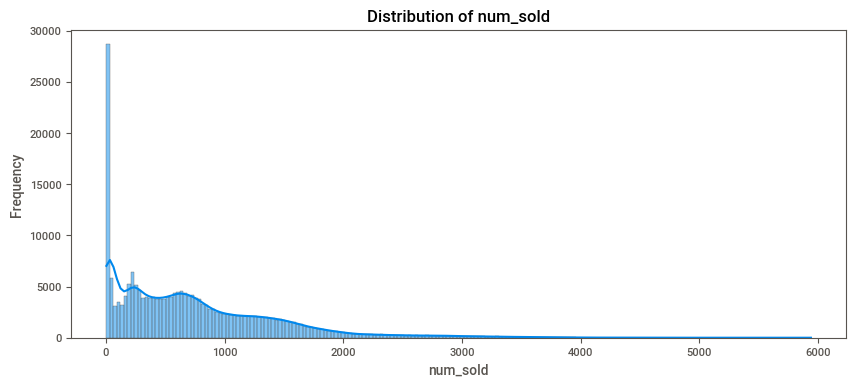

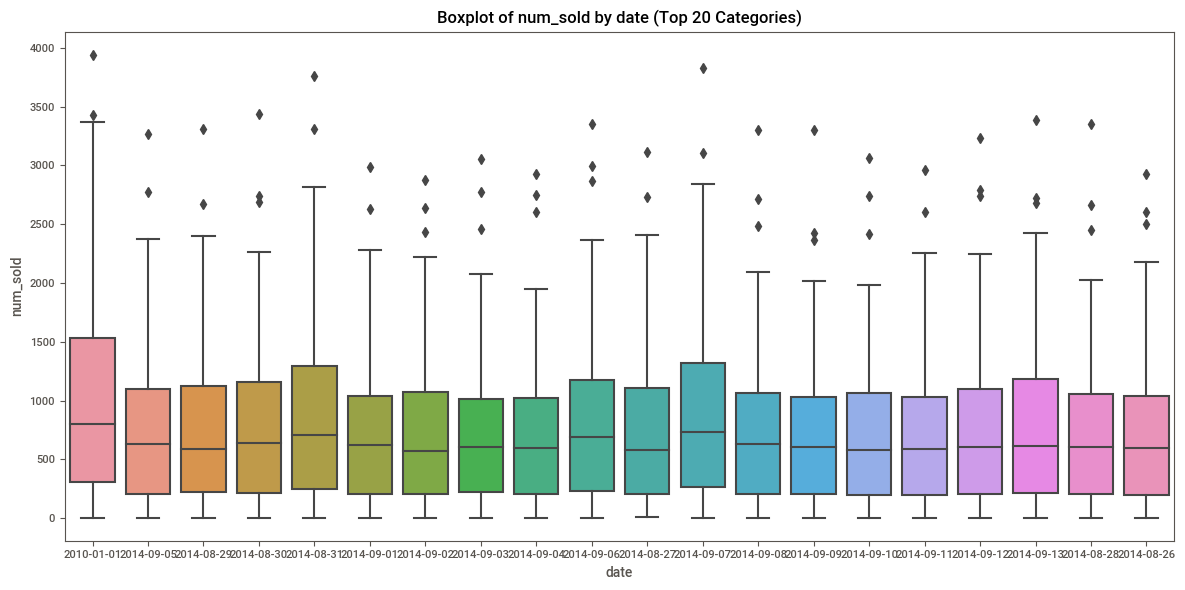

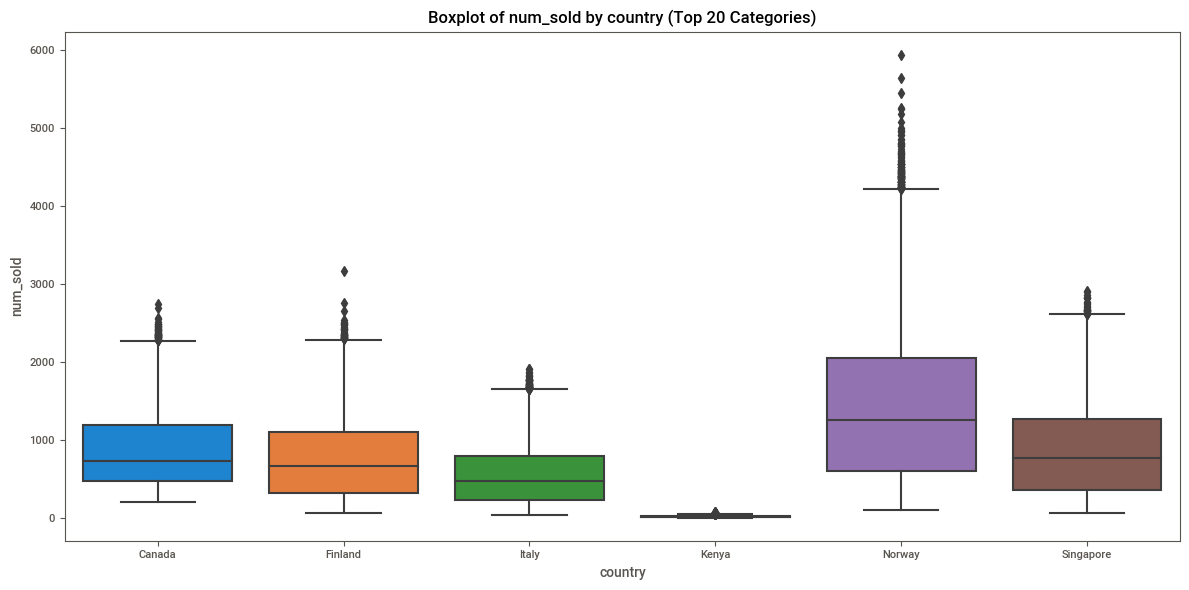

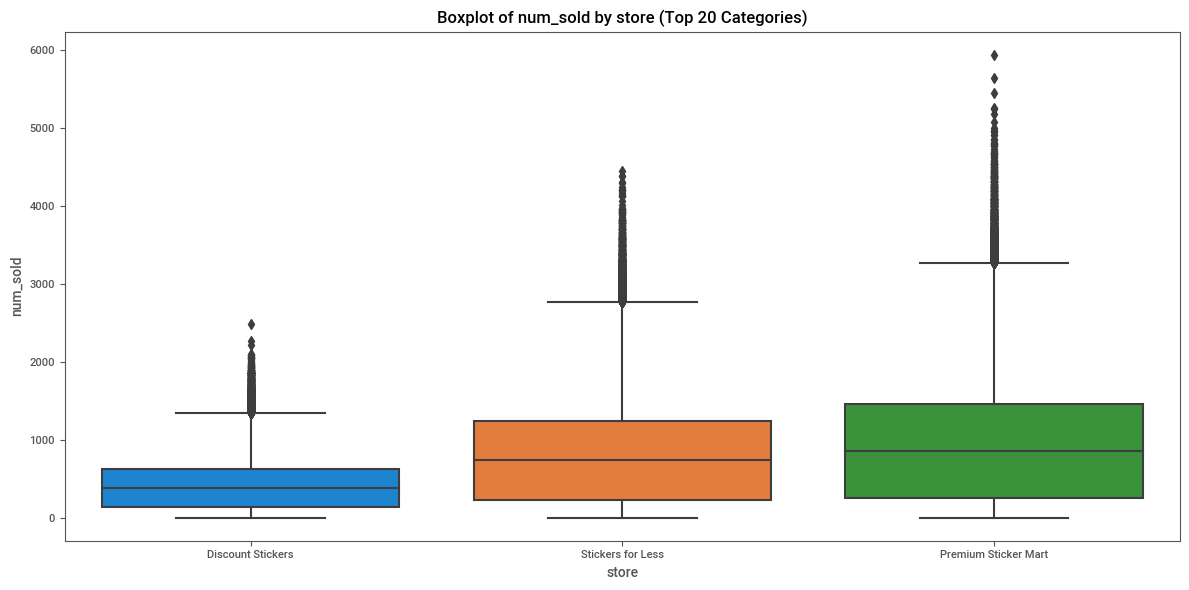

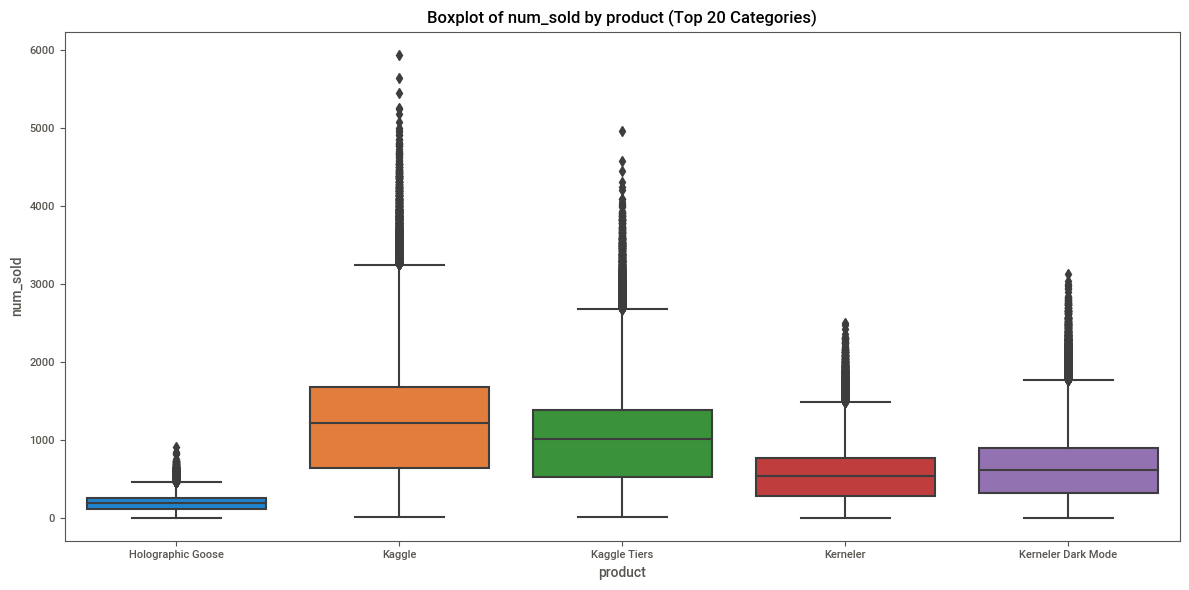

In [13]:
# Automated EDA
eda_visualizations(train_data, target='num_sold')

In [14]:
if RUN_LLM:
    # Generate EDA summary
    summary = eda_summary(train_data)

    # Convert the summary to JSON
    summary_json = json.dumps(summary, indent=4, default=str)

    # Define the template
    template = """Provide an analysis of the following EDA summary: The target variable is num_sold.
{context}

Add a comment about the missing values in the target variable: num_sold. And the implications if those are missing at random or not. 
Key Insights and Observations
    """

    # Create a ChatPromptTemplate
    prompt = ChatPromptTemplate.from_template(template)

    # Prepare parameters for ChatOpenAI
    model_params = {
        "model": SELECTED_LLM,
        "api_key": OPENAI_API_KEY
    }

    # Conditionally set temperature if supported
    if SELECTED_LLM != ADVANCED_LLM:
        model_params["temperature"] = 0  # Set temperature to 0 for BASE_LLM or others

    # Initialize the model with the appropriate parameters
    model = ChatOpenAI(**model_params)

    # Create the processing chain
    chain = prompt | model | StrOutputParser()

    try:
        # Invoke the chain to get the result
        result = chain.invoke(summary_json)

        # Save the result to a Markdown file
        file_path = '/kaggle/working/eda_report.md'
        with open(file_path, 'w') as f:
            f.write(result)

        # Display the result as Markdown in the notebook
        display(Markdown(result))

        print(f"Markdown report saved to: {file_path}")

    except BadRequestError as e:
        print(f"An error occurred: {e}")

**Analysis of the EDA Summary for the Target Variable `num_sold`**

The provided exploratory data analysis (EDA) summary offers valuable insights into the dataset, particularly focusing on the target variable `num_sold`. Below is an analysis of the key aspects related to `num_sold`, with an emphasis on missing values and their implications.

---

### **1. General Overview**

- **Dataset Size**:
  - **Number of Rows**: 230,130
  - **Number of Columns**: 6
- **Variables and Data Types**:
  - **Numerical Variables**:
    - `num_sold`: *float64* (target variable)
  - **Categorical Variables**:
    - `date`: *object*
    - `country`: *object*
    - `store`: *object*
    - `product`: *object*

---

### **2. Missing Values in `num_sold`**

- **Missing Count**:
  - `num_sold` has **8,871 missing values**.
- **Percentage Missing**:
  - This represents approximately **3.85%** of the total observations for `num_sold`.
  - **Total Missing Values in Dataset**: 8,871 out of 1,380,780 possible values (230,130 rows * 6 columns).
  - **Overall Percent Missing**: Approximately **0.64%** of all data points are missing.

#### **Implications of Missing Values in the Target Variable**

1. **Impact on Analysis and Modeling**:
   - Missing values in the target variable prevent the use of those observations in supervised learning models.
   - Reduces the effective sample size, which can impact the model's ability to learn patterns.

2. **Bias Introduction**:
   - If the missing values are **not missing at random** (NMAR), analyses excluding these observations might yield biased results.
   - If certain conditions lead to missing `num_sold` values (e.g., low sales periods are not recorded), this could skew the model's understanding.

3. **Statistical Power**:
   - Loss of data points decreases statistical power and can affect the reliability of model estimates.

#### **Missing Data Mechanisms**

- **Missing Completely at Random (MCAR)**:
  - The missingness is unrelated to any observed or unobserved data.
  - Unbiased parameter estimates can be achieved by analyzing only the complete cases.

- **Missing at Random (MAR)**:
  - The missingness is related to observed data but not the missing data itself.
  - Conditional upon other variables, the data are missing randomly.
  - Appropriate imputation methods can provide unbiased estimates.

- **Missing Not at Random (MNAR)**:
  - The missingness is related to the unobserved missing data.
  - Requires specialized methods to handle, as standard imputation can introduce bias.

#### **Recommendations**

- **Investigate Missingness Patterns**:
  - Analyze whether the missing `num_sold` values are associated with other variables such as `date`, `country`, `store`, or `product`.
  - Use statistical tests or visualization (e.g., missingness heatmaps) to detect patterns.

- **Determine Missingness Mechanism**:
  - If data are MCAR or MAR, standard imputation methods can be applied.
  - If data are MNAR, consider techniques like modeling the missing data mechanism or sensitivity analysis.

- **Imputation Strategies**:
  - **Simple Imputation**:
    - Mean or median substitution (may not be suitable due to skewness).
  - **Advanced Imputation**:
    - Multiple imputation or model-based methods that account for relationships between variables.
  - **Exclusion**:
    - If imputation is not appropriate, exclude observations with missing `num_sold` values (with caution regarding potential bias).

---

### **3. Distribution Characteristics of `num_sold`**

- **Skewness**: **1.415**
  - Indicates a **positively skewed** distribution.
  - Majority of values are lower, with a long tail on the right side representing higher sales numbers.

- **Kurtosis**: **2.612**
  - Kurtosis less than 3 suggests a **platykurtic** distribution.
  - Flatter peak and thinner tails than a normal distribution.

#### **Implications**

- **Data Transformation**:
  - Consider transforming `num_sold` (e.g., log transformation) to reduce skewness.
  - Transformation can improve the normality of the data, benefiting certain modeling techniques.

- **Model Selection**:
  - Use models robust to non-normal distributions (e.g., tree-based algorithms).
  - Be cautious with models that assume normality (e.g., linear regression without transformation).

---

### **4. Outliers in `num_sold`**

- **Outlier Count**: **6,630 observations**
- **Percentage of Outliers**: **Approximately 2.88%** of the data.

#### **Implications**

- **Influence on Analysis**:
  - Outliers can significantly impact mean and standard deviation.
  - They may lead to overfitting in models sensitive to extreme values.

- **Potential Causes**:
  - Genuine high sales events (e.g., holidays, promotions).
  - Data entry errors or anomalies.

#### **Recommendations**

- **Examine Outliers**:
  - Investigate the context of outliers (e.g., time periods, specific products or stores).
  - Determine if they represent valid data points or errors.

- **Handling Outliers**:
  - **Retain**: If they are legitimate and carry important information.
  - **Transform**: Apply transformations to mitigate their impact.
  - **Modify**: Use robust statistical techniques less sensitive to outliers.
  - **Exclude**: Remove if they are confirmed errors (with caution to avoid data loss).

---

### **5. Categorical Variable Insights**

- **Unique Counts**:
  - `date`: 2,557 unique values.
  - `country`: 6 unique values.
  - `store`: 3 unique values.
  - `product`: 5 unique values.

#### **Implications**

- **Granularity**:
  - High cardinality in `date` allows for time series analysis.
  - Variety in `country`, `store`, and `product` enables segmentation and exploration of patterns.

- **Potential Correlations**:
  - Analyze whether missing `num_sold` values correlate with certain categories.
  - Investigate if certain countries, stores, or products have higher instances of missing data.

---

### **Comment on Missing Values in `num_sold` and Their Implications**

The missing values in the target variable `num_sold` are a critical aspect to address:

- **If Missing at Random (MAR)**:
  - The missingness can be explained by other observed variables.
  - Imputation methods using observed data can provide unbiased estimates.
  - Less concern about introducing bias when handling missing data.

- **If Not Missing at Random (NMAR/MNAR)**:
  - The missingness is related to the unobserved `num_sold` values themselves.
  - For example, if sales data is missing during low sales periods due to underreporting.
  - Standard imputation methods may introduce bias.
  - Specialized modeling (e.g., selection models, pattern-mixture models) may be necessary.

#### **Implications for Modeling**

- **Bias and Variance**:
  - Incorrect handling of missing data can lead to biased model parameters.
  - May affect the model's ability to generalize to new data.

- **Model Training**:
  - Observations with missing target values cannot contribute to supervised learning.
  - Need to ensure that the reduced dataset remains representative.

- **Decision-Making**:
  - The approach to handling missing `num_sold` values will influence the reliability of forecasts and insights derived from the model.

---

### **Key Insights and Observations**

1. **Significant Missing Data in Target Variable**:
   - With 3.85% of `num_sold` values missing, it's essential to address this issue to prevent loss of valuable data and potential bias.

2. **Potential for Bias**:
   - If missingness is not random, analyses may be skewed, affecting the validity of conclusions drawn.

3. **Data Distribution Challenges**:
   - Positive skewness and presence of outliers indicate that the data is not normally distributed.
   - Requires careful preprocessing to ensure accurate modeling.

4. **Need for Data Validation**:
   - Discrepancy in overall missing percentage (0.64%) versus missing in `num_sold` (3.85%) suggests potential calculation errors.
   - Re-evaluate the EDA summaries for accuracy.

5. **Importance of Contextual Analysis**:
   - Understanding the context behind missing values and outliers (e.g., seasonal trends, reporting practices) can provide deeper insights.

6. **Impact on Model Selection and Evaluation**:
   - The characteristics of `num_sold` suggest certain models (e.g., linear regression without transformation) may not perform optimally.
   - Models that handle non-normal distributions or are robust to outliers should be considered.

---

### **Recommendations for Next Steps**

- **Data Quality Checks**:
  - Reassess the calculations for missing values and percentages.
  - Ensure data is clean and properly formatted.

- **Missing Data Analysis**:
  - Perform a comprehensive analysis to determine the mechanism of missingness.
  - Use visualizations and statistical tests to detect patterns.

- **Data Imputation Strategy**:
  - Choose appropriate imputation methods based on missingness mechanism.
  - Consider multiple imputation to reflect the uncertainty of imputed values.

- **Transformations and Outlier Treatment**:
  - Apply necessary transformations to normalize the distribution of `num_sold`.
  - Decide on an outlier treatment plan that preserves data integrity.

- **Feature Engineering**:
  - Create new features that might explain variability in `num_sold`.
  - Consider temporal features (e.g., day of the week, month) to capture trends.

- **Modeling Approach**:
  - Select models that are robust to the identified data issues.
  - Evaluate models using appropriate metrics and cross-validation techniques.

- **Documentation and Communication**:
  - Document all steps taken to address missing values and data preprocessing.
  - Communicate any limitations or assumptions made during analysis.

---

By thoroughly addressing the missing values in `num_sold` and understanding their implications, you can improve the accuracy of predictive models and the reliability of insights derived from the data. This careful approach ensures that the final analysis is robust, unbiased, and valuable for decision-making processes.

Markdown report saved to: /kaggle/working/eda_report.md


### Note on Models

`o1-preview` generates interesting insights (v3-4), but I prefer to run simpler models with a temperature of 0, as they will produce similar outputs at each iteration. With a more detailed prompt, `4o` provides outputs of similar quality at a lower cost.

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Detailed EDA 🔍</div>

=== Head of train_data ===


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0



Shape of train_data: (230130, 6)

=== train_data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB
None

=== Descriptive Statistics (Numeric) ===


,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000



=== Missing Values ===
id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64


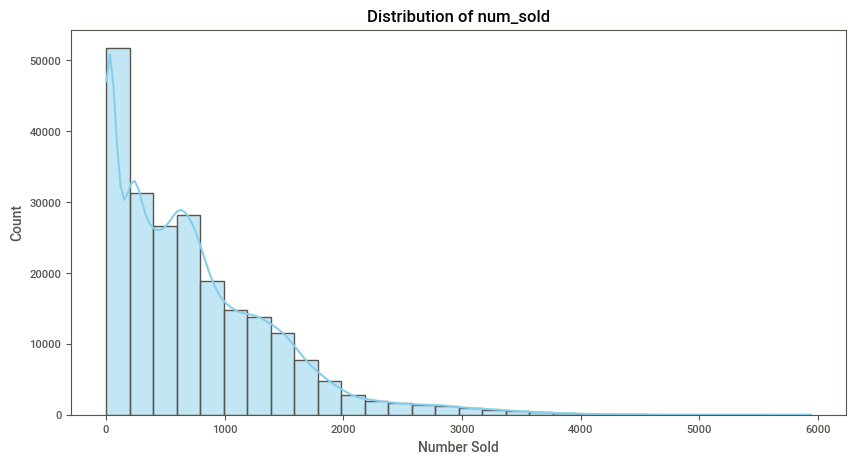

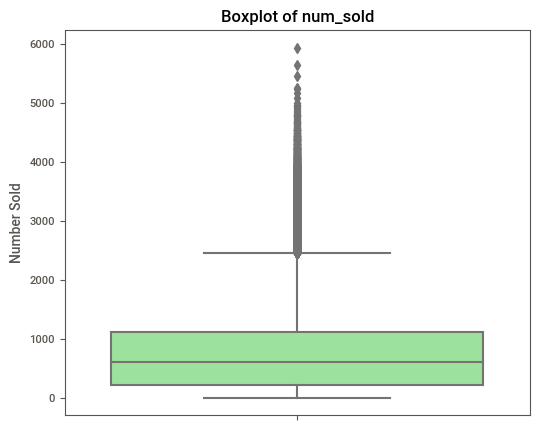

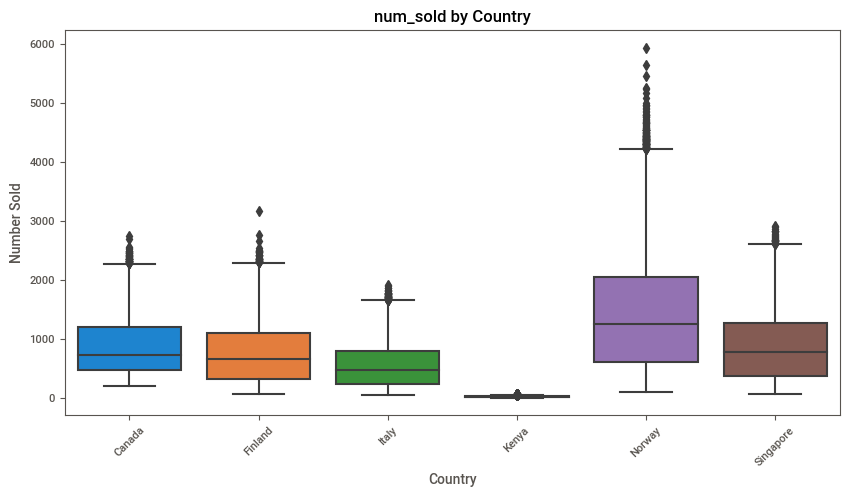

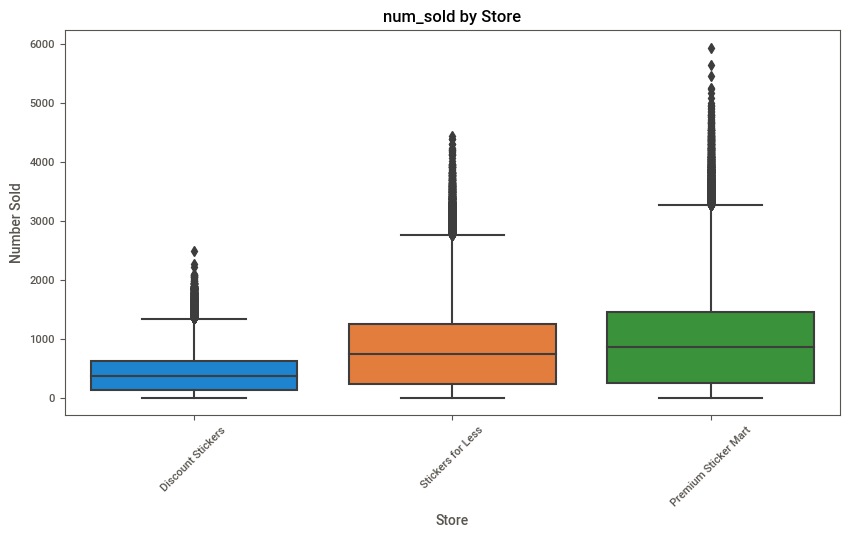

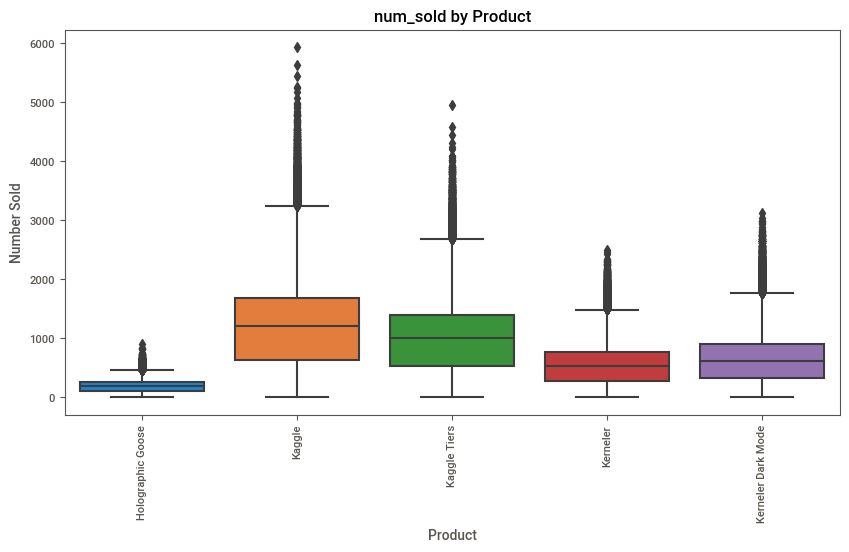

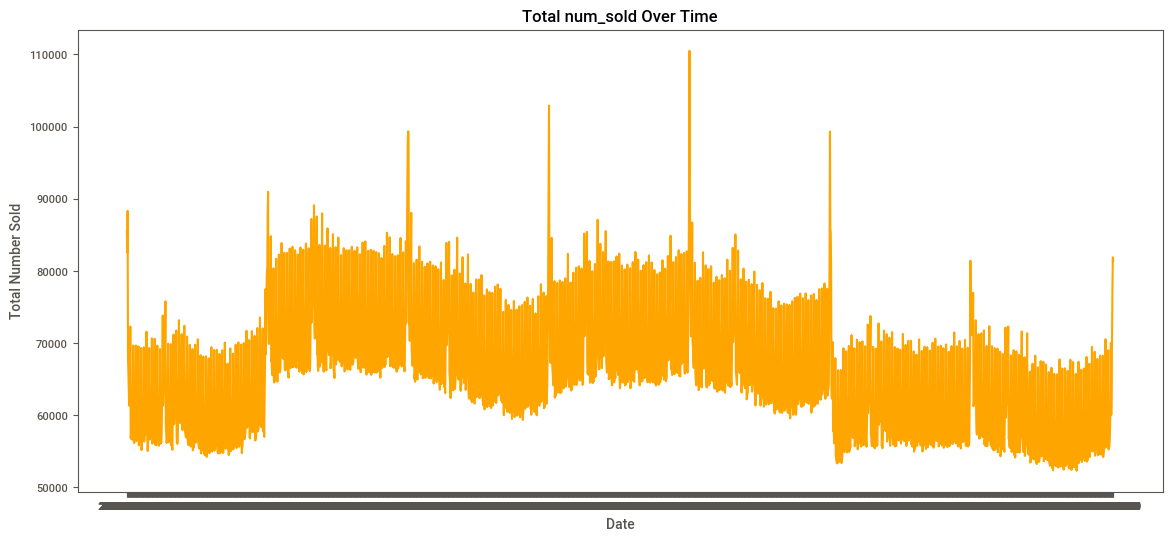

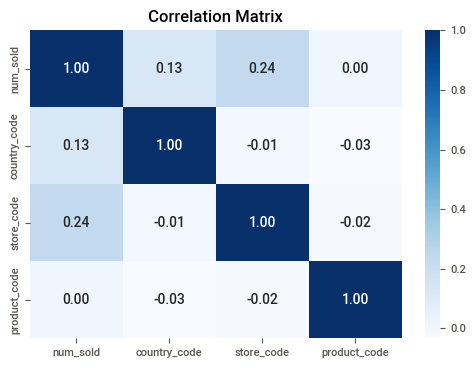

In [15]:
# --------------------------------------------------------
#  Initial Data Exploration
# --------------------------------------------------------

# Check the first few rows
print("=== Head of train_data ===")
display(train_data.head())

# Check the shape
print(f"\nShape of train_data: {train_data.shape}")

# Data types and info
print("\n=== train_data Info ===")
print(train_data.info())

# Check descriptive statistics (numeric columns only)
print("\n=== Descriptive Statistics (Numeric) ===")
display(train_data.describe())

# Check for missing values
print("\n=== Missing Values ===")
print(train_data.isna().sum())

# --------------------------------------------------------
# Target Variable Analysis
# --------------------------------------------------------
# The target variable is 'num_sold'.

# Distribution of num_sold
plt.figure(figsize=(10, 5))
sns.histplot(data=train_data, x='num_sold', kde=True, bins=30, color='skyblue')
plt.title("Distribution of num_sold")
plt.xlabel("Number Sold")
plt.ylabel("Count")
plt.show()

# Boxplot of num_sold
plt.figure(figsize=(6, 5))
sns.boxplot(data=train_data, y='num_sold', color='lightgreen')
plt.title("Boxplot of num_sold")
plt.ylabel("Number Sold")
plt.show()

# --------------------------------------------------------
#  Categorical Features vs. Target
# --------------------------------------------------------
# We have country, store, and product as categorical features.

# Boxplot: country vs. num_sold
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_data, x='country', y='num_sold')
plt.title("num_sold by Country")
plt.xlabel("Country")
plt.ylabel("Number Sold")
plt.xticks(rotation=45)
plt.show()

# Boxplot: store vs. num_sold
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_data, x='store', y='num_sold')
plt.title("num_sold by Store")
plt.xlabel("Store")
plt.ylabel("Number Sold")
plt.xticks(rotation=45)
plt.show()

# Boxplot: product vs. num_sold
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_data, x='product', y='num_sold')
plt.title("num_sold by Product")
plt.xlabel("Product")
plt.ylabel("Number Sold")
plt.xticks(rotation=90)
plt.show()

# --------------------------------------------------------
#  Time Series Analysis
# --------------------------------------------------------

# Group by date to see overall trend
sales_by_date = train_data.groupby('date')['num_sold'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_by_date, x='date', y='num_sold', color='orange')
plt.title("Total num_sold Over Time")
plt.xlabel("Date")
plt.ylabel("Total Number Sold")
plt.show()

# --------------------------------------------------------
#  Correlation Analysis
# --------------------------------------------------------
# For correlation, let's convert country, store, and product into numeric codes
# (just to see if there's any correlation among features).
# However, note that these codes do not necessarily preserve meaningful distance between categories.

encoded_data = train_data.copy()

# We must handle missing values in num_sold if we want a correlation plot:
encoded_data = encoded_data.dropna(subset=['num_sold']).reset_index(drop=True)

encoded_data['country_code'] = encoded_data['country'].astype('category').cat.codes
encoded_data['store_code']   = encoded_data['store'].astype('category').cat.codes
encoded_data['product_code'] = encoded_data['product'].astype('category').cat.codes

corr_features = ['num_sold', 'country_code', 'store_code', 'product_code']
corr_matrix = encoded_data[corr_features].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


=== Proportion of Missing by Country ===
country
Kenya        0.120584
Canada       0.110703
Finland      0.000000
Italy        0.000000
Norway       0.000000
Singapore    0.000000
Name: missing_num_sold, dtype: float64

=== Proportion of Missing by Store ===
store
Discount Stickers       0.067514
Stickers for Less       0.034754
Premium Sticker Mart    0.013375
Name: missing_num_sold, dtype: float64

=== Proportion of Missing by Product ===
product
Holographic Goose     0.191327
Kerneler              0.001391
Kerneler Dark Mode    0.000022
Kaggle                0.000000
Kaggle Tiers          0.000000
Name: missing_num_sold, dtype: float64

=== Missingness by Date (Top 10 Dates) ===
date
2010-04-21    0.077778
2010-04-01    0.077778
2010-05-11    0.077778
2010-06-01    0.077778
2010-07-24    0.066667
2010-05-05    0.066667
2010-04-29    0.066667
2010-08-03    0.066667
2010-08-02    0.066667
2011-06-14    0.066667
Name: missing_num_sold, dtype: float64


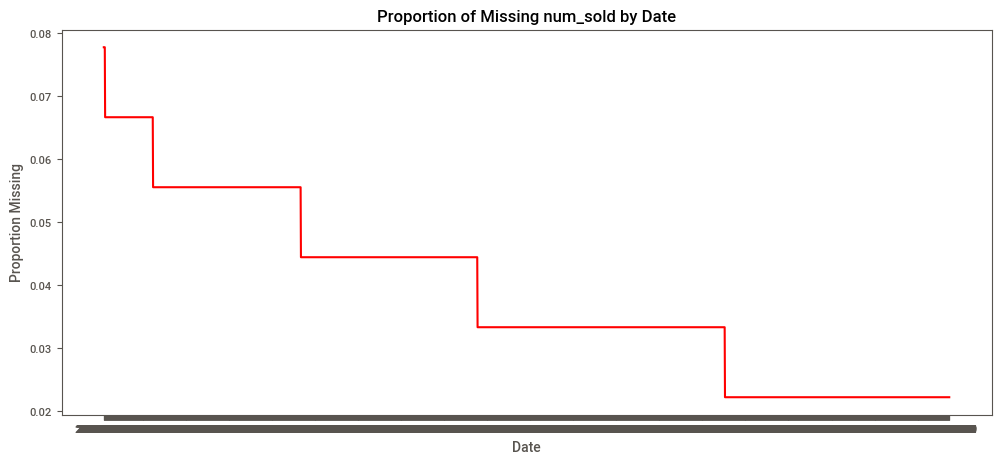

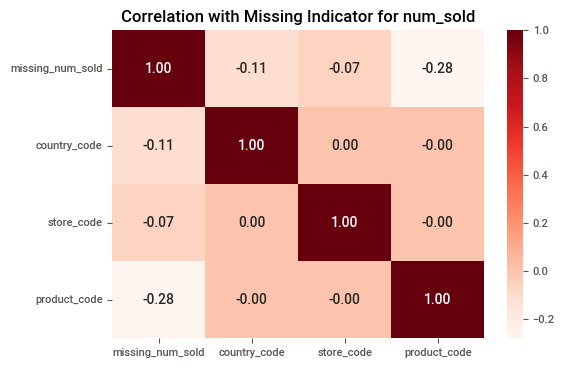

In [16]:
# --------------------------------------------------------
#  Missing Value Analysis
# --------------------------------------------------------
# We want to see if the missing values in 'num_sold' appear randomly
# or show patterns related to other features.

# Create a binary indicator for missingness
train_data['missing_num_sold'] = train_data['num_sold'].isnull().astype(int)

# Check the proportion of missing values by each category
print("\n=== Proportion of Missing by Country ===")
missing_country = train_data.groupby('country')['missing_num_sold'].mean().sort_values(ascending=False)
print(missing_country)

print("\n=== Proportion of Missing by Store ===")
missing_store = train_data.groupby('store')['missing_num_sold'].mean().sort_values(ascending=False)
print(missing_store)

print("\n=== Proportion of Missing by Product ===")
missing_product = train_data.groupby('product')['missing_num_sold'].mean().sort_values(ascending=False)
print(missing_product)

# Missingness over time (to see if certain periods have more missing)
print("\n=== Missingness by Date (Top 10 Dates) ===")
missing_by_date = train_data.groupby('date')['missing_num_sold'].mean().sort_values(ascending=False)
print(missing_by_date.head(10))

# Optional: Visualize missing proportion by date
plt.figure(figsize=(12, 5))
sns.lineplot(x=missing_by_date.index, y=missing_by_date.values, color='red')
plt.title("Proportion of Missing num_sold by Date")
plt.xlabel("Date")
plt.ylabel("Proportion Missing")
plt.show()

# Quick correlation check with missing_num_sold 
# (turning categories into numeric codes again, but including missing indicator)
encoded_missing = train_data.copy()
encoded_missing['country_code'] = encoded_missing['country'].astype('category').cat.codes
encoded_missing['store_code']   = encoded_missing['store'].astype('category').cat.codes
encoded_missing['product_code'] = encoded_missing['product'].astype('category').cat.codes

# We'll drop rows where date is missing, but presumably date isn't missing.
encoded_missing = encoded_missing.dropna(subset=['date'])  # just in case

missing_corr_features = ['missing_num_sold', 'country_code', 'store_code', 'product_code']
missing_corr_matrix = encoded_missing[missing_corr_features].corr()

plt.figure(figsize=(6,4))
sns.heatmap(missing_corr_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation with Missing Indicator for num_sold")
plt.show()

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">EDA Insights 💡</div>

- **Non-Random Missingness**

- Kenya (12%) and Canada (11%) exhibit notably higher missing rates compared to other countries.
- The “Holographic Goose” product has a missing rate of 19%, which is significantly above the rest.
- This clustering of missing values in specific categories implies the data is not missing completely at random (MCAR). Instead, it's likely missing at random (MAR) or even missing not at random (MNAR).

- **location**

- The higher prices and outliers are observed in Norway.

- The lower prices are located observed in Kenya.

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Discussions Insights 💡</div>

- The public LB is based on the first year. Private LB will the remaing years. This could suggest a potential for shake up. see [Public LB occurs before the private LB and is sequential!](https://www.kaggle.com/competitions/playground-series-s5e1/discussion/554338)
- Simple linear models outperform tree boosted models here. see
    - [Tests I did.](https://www.kaggle.com/competitions/playground-series-s5e1/discussion/555031)
    - [Forecasting Sticker Sales](https://www.kaggle.com/competitions/playground-series-s5e1/discussion/555031)

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Baseline Model: Random Forest 🌳</div>

In [17]:
train_data = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')

In [18]:
# --------------------------------------------------------
# Feature Engineering
# --------------------------------------------------------
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Drop rows with missing target
train_data = train_data.dropna(subset=['num_sold'])
print("Train shape after dropping missing target:", train_data.shape)

# Create date-based features
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['dayofweek'] = train_data['date'].dt.dayofweek

test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['dayofweek'] = test_data['date'].dt.dayofweek

# --------------------------------------------------------
# Split Features & Target (UNSORTED for final training)
# --------------------------------------------------------
X = train_data.drop(columns=['id', 'date', 'num_sold'])
y = train_data['num_sold']

X_test = test_data.drop(columns=['id', 'date'])

# --------------------------------------------------------
# Build scikit-learn Pipeline
# --------------------------------------------------------
cat_cols = ['country', 'store', 'product']
num_cols = ['year', 'month', 'dayofweek']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, random_state=42))
])

# --------------------------------------------------------
# Generate Timestamp
# --------------------------------------------------------
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# --------------------------------------------------------
# Time-based Cross Validation with OOF Predictions
# --------------------------------------------------------

# 1) Sort the training data by date and reset the index
train_data_sorted = train_data.sort_values(by='date').reset_index(drop=True)

# 2) Build X_sorted, y_sorted from the RE-INDEXED DataFrame
X_sorted = train_data_sorted.drop(columns=['id', 'date', 'num_sold'])
y_sorted = train_data_sorted['num_sold']

# 3) Prepare OOF array
oof_predictions = np.zeros(len(train_data_sorted))

# 4) TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
scores = []

for fold, (train_index, valid_index) in enumerate(tscv.split(X_sorted), 1):
    # Split
    X_train_cv, X_valid_cv = X_sorted.iloc[train_index], X_sorted.iloc[valid_index]
    y_train_cv, y_valid_cv = y_sorted.iloc[train_index], y_sorted.iloc[valid_index]
    
    # Fit
    model_pipeline.fit(X_train_cv, y_train_cv)
    preds = model_pipeline.predict(X_valid_cv)
    
    # Store OOF predictions
    oof_predictions[valid_index] = preds
    
    # Compute MAPE
    mape = np.mean(np.abs((y_valid_cv - preds) / y_valid_cv))
    scores.append(mape)
    print(f"Fold {fold} MAPE: {mape:.2%}")

print("TimeSeriesSplit MAPE Scores:", scores)
print("Average MAPE:", np.mean(scores))

# --------------------------------------------------------
# Save OOF Predictions
# --------------------------------------------------------

# 5) Match OOF predictions to the correct IDs from the re-indexed DataFrame
oof_df = pd.DataFrame({
    'id': train_data_sorted['id'],
    'oof_num_sold': oof_predictions
})

oof_filename = f"oof_predictions_m01_{timestamp_str}.csv"
oof_df.to_csv(oof_filename, index=False)
print(f"OOF predictions saved as {oof_filename}")

# --------------------------------------------------------
# Train on Full Dataset & Predict on Test
# --------------------------------------------------------
model_pipeline.fit(X, y)
test_preds = model_pipeline.predict(X_test)

# --------------------------------------------------------
# Save Trained Model
# --------------------------------------------------------
model_filename = f"model_01_{timestamp_str}.pkl"
joblib.dump(model_pipeline, model_filename)
print(f"Trained model saved as {model_filename}")

# --------------------------------------------------------
# Submission
# --------------------------------------------------------
submission = pd.DataFrame({
    'id': test_data['id'],
    'num_sold': test_preds
})

submission_filename = f"sub_m01_{timestamp_str}.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission saved as {submission_filename}")

Train shape after dropping missing target: (221259, 6)
Fold 1 MAPE: 9.78%
Fold 2 MAPE: 8.69%
Fold 3 MAPE: 7.41%
Fold 4 MAPE: 11.84%
Fold 5 MAPE: 7.80%
TimeSeriesSplit MAPE Scores: [0.09783607505828223, 0.08687342639003247, 0.07410697702212209, 0.11835915101525217, 0.07797291953808218]
Average MAPE: 0.09102970980475424
OOF predictions saved as oof_predictions_m01_20250110_194914.csv
Trained model saved as model_01_20250110_194914.pkl
Submission saved as sub_m01_20250110_194914.csv


In [19]:
submission.head()

,id,num_sold
0,230130,135.221667
1,230131,745.570254
2,230132,653.929766
3,230133,328.388556
4,230134,422.735706


In [20]:
oof_df.head()

,id,oof_num_sold
0,1,0.0
1,65,0.0
2,64,0.0
3,63,0.0
4,62,0.0


I made a mistake with the out of fold predictions - currently debugging this. The bug is likely at the TimeSeriesSplit stage. 

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Baseline Model: Linear Regression </div>

In [21]:
train_data = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')

In [22]:
# --------------------------------------------------------
# Feature Engineering
# --------------------------------------------------------
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Drop rows with missing target
train_data = train_data.dropna(subset=['num_sold'])
print("Train shape after dropping missing target:", train_data.shape)

# Create date-based features
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['dayofweek'] = train_data['date'].dt.dayofweek

test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['dayofweek'] = test_data['date'].dt.dayofweek

# --------------------------------------------------------
# Split Features & Target (UNSORTED for final training)
# --------------------------------------------------------
X = train_data.drop(columns=['id', 'date', 'num_sold'])
y = train_data['num_sold']

X_test = test_data.drop(columns=['id', 'date'])

# --------------------------------------------------------
# Build scikit-learn Pipeline
# --------------------------------------------------------
cat_cols = ['country', 'store', 'product']
num_cols = ['year', 'month', 'dayofweek']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Replace RandomForestRegressor with LinearRegression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Use Linear Regression instead of Random Forest
])

# --------------------------------------------------------
# Generate Timestamp
# --------------------------------------------------------
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# --------------------------------------------------------
# Time-based Cross Validation with OOF Predictions
# --------------------------------------------------------

# 1) Sort the training data by date and reset the index
train_data_sorted = train_data.sort_values(by='date').reset_index(drop=True)

# 2) Build X_sorted, y_sorted from the RE-INDEXED DataFrame
X_sorted = train_data_sorted.drop(columns=['id', 'date', 'num_sold'])
y_sorted = train_data_sorted['num_sold']

# 3) Prepare OOF array
oof_predictions = np.zeros(len(train_data_sorted))

# 4) TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
scores = []

for fold, (train_index, valid_index) in enumerate(tscv.split(X_sorted), 1):
    # Split
    X_train_cv, X_valid_cv = X_sorted.iloc[train_index], X_sorted.iloc[valid_index]
    y_train_cv, y_valid_cv = y_sorted.iloc[train_index], y_sorted.iloc[valid_index]
    
    # Fit
    model_pipeline.fit(X_train_cv, y_train_cv)
    preds = model_pipeline.predict(X_valid_cv)
    
    # Store OOF predictions
    oof_predictions[valid_index] = preds
    
    # Compute MAPE
    epsilon = 1e-10
    mape = np.mean(np.abs((y_valid_cv - preds) / (y_valid_cv + epsilon)))
    scores.append(mape)
    print(f"Fold {fold} MAPE: {mape:.2%}")

print("TimeSeriesSplit MAPE Scores:", scores)
print("Average MAPE:", np.mean(scores))

# --------------------------------------------------------
# Save OOF Predictions
# --------------------------------------------------------

# 5) Match OOF predictions to the correct IDs from the re-indexed DataFrame
oof_df = pd.DataFrame({
    'id': train_data_sorted['id'],
    'oof_num_sold': oof_predictions
})

oof_filename = f"oof_predictions_m02_{timestamp_str}.csv"
oof_df.to_csv(oof_filename, index=False)
print(f"OOF predictions saved as {oof_filename}")

# --------------------------------------------------------
# Train on Full Dataset & Predict on Test
# --------------------------------------------------------
model_pipeline.fit(X, y)
test_preds = model_pipeline.predict(X_test)

# --------------------------------------------------------
# Save Trained Model
# --------------------------------------------------------
model_filename = f"model_02_{timestamp_str}.pkl"
joblib.dump(model_pipeline, model_filename)
print(f"Trained model saved as {model_filename}")

# --------------------------------------------------------
# Submission
# --------------------------------------------------------
submission = pd.DataFrame({
    'id': test_data['id'],
    'num_sold': test_preds
})

submission_filename = f"sub_m02_{timestamp_str}.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission saved as {submission_filename}")

Train shape after dropping missing target: (221259, 6)
Fold 1 MAPE: 368.48%
Fold 2 MAPE: 415.93%
Fold 3 MAPE: 448.88%
Fold 4 MAPE: 481.96%
Fold 5 MAPE: 481.50%
TimeSeriesSplit MAPE Scores: [3.6848418500775453, 4.159321715008381, 4.488797609091276, 4.819597765852032, 4.814967825163824]
Average MAPE: 4.393505353038612
OOF predictions saved as oof_predictions_m02_20250110_195032.csv
Trained model saved as model_02_20250110_195032.pkl
Submission saved as sub_m02_20250110_195032.csv


# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Baseline Model: XGBoost 1 🌳</div>

In [23]:
train_data = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')

In [24]:
# --------------------------------------------------------
# Feature Engineering
# --------------------------------------------------------
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Drop rows with missing target
train_data = train_data.dropna(subset=['num_sold'])
print("Train shape after dropping missing target:", train_data.shape)

# Create date-based features
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['dayofweek'] = train_data['date'].dt.dayofweek

test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['dayofweek'] = test_data['date'].dt.dayofweek

# --------------------------------------------------------
# Split Features & Target (UNSORTED for final training)
# --------------------------------------------------------
X = train_data.drop(columns=['id', 'date', 'num_sold'])
y = train_data['num_sold']

X_test = test_data.drop(columns=['id', 'date'])

# --------------------------------------------------------
# Build scikit-learn Pipeline
# --------------------------------------------------------
cat_cols = ['country', 'store', 'product']
num_cols = ['year', 'month', 'dayofweek']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Replace RandomForestRegressor with XGBRegressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        objective='reg:squarederror',  # Suitable for regression tasks
        n_estimators=500,              # Number of trees
        learning_rate=0.1,             # Learning rate
        max_depth=12,                   # Maximum tree depth
        random_state=42,               # For reproducibility
        n_jobs=-1                      # Use all available cores
    ))
])

# --------------------------------------------------------
# Generate Timestamp
# --------------------------------------------------------
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# --------------------------------------------------------
# Time-based Cross Validation with OOF Predictions
# --------------------------------------------------------

# 1) Sort the training data by date and reset the index
train_data_sorted = train_data.sort_values(by='date').reset_index(drop=True)

# 2) Build X_sorted, y_sorted from the RE-INDEXED DataFrame
X_sorted = train_data_sorted.drop(columns=['id', 'date', 'num_sold'])
y_sorted = train_data_sorted['num_sold']

# 3) Prepare OOF array
oof_predictions = np.zeros(len(train_data_sorted))

# 4) TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
scores = []

for fold, (train_index, valid_index) in enumerate(tscv.split(X_sorted), 1):
    # Split
    X_train_cv, X_valid_cv = X_sorted.iloc[train_index], X_sorted.iloc[valid_index]
    y_train_cv, y_valid_cv = y_sorted.iloc[train_index], y_sorted.iloc[valid_index]
    
    # Fit
    model_pipeline.fit(X_train_cv, y_train_cv)
    preds = model_pipeline.predict(X_valid_cv)
    
    # Store OOF predictions
    oof_predictions[valid_index] = preds
    
    # Compute MAPE
    epsilon = 1e-10
    mape = np.mean(np.abs((y_valid_cv - preds) / (y_valid_cv + epsilon)))
    scores.append(mape)
    print(f"Fold {fold} MAPE: {mape:.2%}")

print("TimeSeriesSplit MAPE Scores:", scores)
print("Average MAPE:", np.mean(scores))

# --------------------------------------------------------
# Save OOF Predictions
# --------------------------------------------------------

# 5) Match OOF predictions to the correct IDs from the re-indexed DataFrame
oof_df = pd.DataFrame({
    'id': train_data_sorted['id'],
    'oof_num_sold': oof_predictions
})

oof_filename = f"oof_predictions_m03_{timestamp_str}.csv"
oof_df.to_csv(oof_filename, index=False)
print(f"OOF predictions saved as {oof_filename}")

# --------------------------------------------------------
# Train on Full Dataset & Predict on Test
# --------------------------------------------------------
model_pipeline.fit(X, y)
test_preds = model_pipeline.predict(X_test)

# --------------------------------------------------------
# Save Trained Model
# --------------------------------------------------------
model_filename = f"model_03_{timestamp_str}.pkl"
joblib.dump(model_pipeline, model_filename)
print(f"Trained model saved as {model_filename}")

# --------------------------------------------------------
# Submission
# --------------------------------------------------------
submission = pd.DataFrame({
    'id': test_data['id'],
    'num_sold': test_preds
})

submission_filename = f"sub_m03_{timestamp_str}.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission saved as {submission_filename}")

Train shape after dropping missing target: (221259, 6)
Fold 1 MAPE: 9.80%
Fold 2 MAPE: 9.10%
Fold 3 MAPE: 8.25%
Fold 4 MAPE: 12.35%
Fold 5 MAPE: 7.76%
TimeSeriesSplit MAPE Scores: [0.09800716249176465, 0.09103119655902112, 0.08254164346511342, 0.12353823185755014, 0.07763420712281988]
Average MAPE: 0.09455048829925385
OOF predictions saved as oof_predictions_m03_20250110_195035.csv
Trained model saved as model_03_20250110_195035.pkl
Submission saved as sub_m03_20250110_195035.csv


# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Baseline Model: XGBoost 2 🌳</div>

In [25]:
train_data = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')

In [26]:
# --------------------------------------------------------
# Feature Engineering
# --------------------------------------------------------
# Convert to datetime
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Drop rows with missing target
train_data = train_data.dropna(subset=['num_sold'])
print("Train shape after dropping missing target:", train_data.shape)

# Create date-based features
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['dayofweek'] = train_data['date'].dt.dayofweek

test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['dayofweek'] = test_data['date'].dt.dayofweek

# Create country-specific holiday objects
# Adjust to match your actual country names
country_holidays = {
    'Finland': holidays.Finland(),
    'Norway': holidays.Norway(),
    'Sweden': holidays.Sweden()
}

# Add holiday feature (1 if date is holiday in country, else 0)
train_data['is_holiday'] = train_data.apply(
    lambda row: 1 if row['date'] in country_holidays.get(row['country'], {}) else 0,
    axis=1
)
test_data['is_holiday'] = test_data.apply(
    lambda row: 1 if row['date'] in country_holidays.get(row['country'], {}) else 0,
    axis=1
)

# --------------------------------------------------------
# Split Features & Target
# --------------------------------------------------------
X = train_data.drop(columns=['id', 'date', 'num_sold'])
y = train_data['num_sold']

X_test = test_data.drop(columns=['id', 'date'])

cat_cols = ['country', 'store', 'product']
num_cols = ['year', 'month', 'dayofweek', 'is_holiday']

# --------------------------------------------------------
# Build scikit-learn Pipeline
# --------------------------------------------------------
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Base pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        objective='reg:squarederror',
        n_estimators=500,
        learning_rate=0.1,
        max_depth=12,
        random_state=42,
        n_jobs=-1
    ))
])

# --------------------------------------------------------
# Hyperparameter Tuning (RandomizedSearchCV)
# --------------------------------------------------------
# Define parameter distributions for XGBoost
param_distributions = {
    'regressor__n_estimators': [500, 1000, 1500],
    'regressor__learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.3],
    'regressor__max_depth': [10, 15, 24],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0]
}

# Custom scoring if desired, e.g., negative MAPE or negative RMSE
# For demonstration, let's use MAE:
from sklearn.metrics import mean_absolute_error
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

random_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=param_distributions,
    n_iter=20,               
    scoring=mae_scorer,
    cv=2,                     
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Starting RandomizedSearchCV...")
random_search.fit(X, y)

print("Best Params:", random_search.best_params_)
print("Best Score (MAE):", random_search.best_score_)

# Extract best pipeline
best_model_pipeline = random_search.best_estimator_

# --------------------------------------------------------
# Time-based Cross Validation with OOF Predictions
# --------------------------------------------------------
# Optional step: further evaluate with TimeSeriesSplit
train_data_sorted = train_data.sort_values(by='date').reset_index(drop=True)
X_sorted = train_data_sorted.drop(columns=['id', 'date', 'num_sold'])
y_sorted = train_data_sorted['num_sold']

oof_predictions = np.zeros(len(train_data_sorted))
tscv = TimeSeriesSplit(n_splits=5)
scores = []

for fold, (train_index, valid_index) in enumerate(tscv.split(X_sorted), 1):
    X_train_cv, X_valid_cv = X_sorted.iloc[train_index], X_sorted.iloc[valid_index]
    y_train_cv, y_valid_cv = y_sorted.iloc[train_index], y_sorted.iloc[valid_index]
    
    best_model_pipeline.fit(X_train_cv, y_train_cv)
    preds = best_model_pipeline.predict(X_valid_cv)

    oof_predictions[valid_index] = preds
    
    # Compute MAPE
    epsilon = 1e-10
    mape = np.mean(np.abs((y_valid_cv - preds) / (y_valid_cv + epsilon)))
    scores.append(mape)
    print(f"Fold {fold} MAPE: {mape:.2%}")

print("TimeSeriesSplit MAPE Scores:", scores)
print("Average MAPE:", np.mean(scores))

# Save OOF predictions
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
oof_df = pd.DataFrame({
    'id': train_data_sorted['id'],
    'oof_num_sold': oof_predictions
})
oof_filename = f"oof_predictions_m04_{timestamp_str}.csv"
oof_df.to_csv(oof_filename, index=False)
print(f"OOF predictions saved as {oof_filename}")

# --------------------------------------------------------
# Train on Full Dataset & Predict on Test
# --------------------------------------------------------
best_model_pipeline.fit(X, y)
test_preds = best_model_pipeline.predict(X_test)

# --------------------------------------------------------
# Save Trained Model & Create Submission
# --------------------------------------------------------
model_filename = f"model_04_{timestamp_str}.pkl"
joblib.dump(best_model_pipeline, model_filename)
print(f"Trained model saved as {model_filename}")

submission = pd.DataFrame({
    'id': test_data['id'],
    'num_sold': test_preds
})
submission_filename = f"sub_m04_{timestamp_str}.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission saved as {submission_filename}")

Train shape after dropping missing target: (221259, 6)
Starting RandomizedSearchCV...
Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Params: {'regressor__subsample': 0.6, 'regressor__n_estimators': 1500, 'regressor__max_depth': 10, 'regressor__learning_rate': 0.01, 'regressor__colsample_bytree': 0.8}
Best Score (MAE): -87.53032663091756
Fold 1 MAPE: 10.15%
Fold 2 MAPE: 9.50%
Fold 3 MAPE: 8.41%
Fold 4 MAPE: 12.32%
Fold 5 MAPE: 8.43%
TimeSeriesSplit MAPE Scores: [0.10152577145833781, 0.09497030424556249, 0.08412966209501524, 0.12315950671579537, 0.0842814765055236]
Average MAPE: 0.0976133442040469
OOF predictions saved as oof_predictions_m04_20250110_201109.csv
Trained model saved as model_04_20250110_201109.pkl
Submission saved as sub_m04_20250110_201109.csv


# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">AutoML baseline: AutoGluon</div>

Ongoing: https://www.kaggle.com/code/wguesdon/ps-s5-e01-autogluon

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Baseline Model: LGBM 1 🌳</div>

In [27]:
# --------------------------------------------------------
# 1) Imports
# --------------------------------------------------------
import datetime
import numpy as np
import pandas as pd

from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from joblib import dump as joblib_dump

# Instead of RandomForest, import LightGBM
from lightgbm import LGBMRegressor

train_data = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')

In [28]:
# --------------------------------------------------------
# 2) Feature Engineering
# --------------------------------------------------------
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Drop rows with missing target
train_data = train_data.dropna(subset=['num_sold'])
print("Train shape after dropping missing target:", train_data.shape)

# Create date-based features
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['dayofweek'] = train_data['date'].dt.dayofweek

test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['dayofweek'] = test_data['date'].dt.dayofweek

# --------------------------------------------------------
# 3) Split Features & Target (UNSORTED for final training)
# --------------------------------------------------------
X = train_data.drop(columns=['id', 'date', 'num_sold'])
y = train_data['num_sold']

X_test = test_data.drop(columns=['id', 'date'])

# --------------------------------------------------------
# 4) Build scikit-learn Pipeline
# --------------------------------------------------------
cat_cols = ['country', 'store', 'product']
num_cols = ['year', 'month', 'dayofweek']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# --- REPLACE RandomForest WITH LightGBMRegressor HERE ---
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(
        n_estimators=1000,    # example hyperparam
        learning_rate=0.05,   # example hyperparam
        random_state=42
    ))
])

# --------------------------------------------------------
# 5) Generate Timestamp
# --------------------------------------------------------
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# --------------------------------------------------------
# 6) Time-based Cross Validation with OOF Predictions
# --------------------------------------------------------

# 1) Sort the training data by date and reset the index
train_data_sorted = train_data.sort_values(by='date').reset_index(drop=True)

# 2) Build X_sorted, y_sorted from the re-indexed DataFrame
X_sorted = train_data_sorted.drop(columns=['id', 'date', 'num_sold'])
y_sorted = train_data_sorted['num_sold']

# 3) Prepare OOF array
oof_predictions = np.zeros(len(train_data_sorted))

# 4) TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
scores = []

for fold, (train_index, valid_index) in enumerate(tscv.split(X_sorted), 1):
    # Split
    X_train_cv, X_valid_cv = X_sorted.iloc[train_index], X_sorted.iloc[valid_index]
    y_train_cv, y_valid_cv = y_sorted.iloc[train_index], y_sorted.iloc[valid_index]
    
    # Fit
    model_pipeline.fit(X_train_cv, y_train_cv)
    preds = model_pipeline.predict(X_valid_cv)
    
    # Store OOF predictions
    oof_predictions[valid_index] = preds
    
    # Compute MAPE (or any other metric)
    mape = np.mean(np.abs((y_valid_cv - preds) / y_valid_cv))
    scores.append(mape)
    print(f"Fold {fold} MAPE: {mape:.2%}")

print("TimeSeriesSplit MAPE Scores:", scores)
print("Average MAPE:", np.mean(scores))

# --------------------------------------------------------
# 7) Save OOF Predictions
# --------------------------------------------------------
oof_df = pd.DataFrame({
    'id': train_data_sorted['id'],
    'oof_num_sold': oof_predictions
})

oof_filename = f"oof_predictions_m06_{timestamp_str}.csv"
oof_df.to_csv(oof_filename, index=False)
print(f"OOF predictions saved as {oof_filename}")

# --------------------------------------------------------
# 8) Train on Full Dataset & Predict on Test
# --------------------------------------------------------
model_pipeline.fit(X, y)
test_preds = model_pipeline.predict(X_test)

# --------------------------------------------------------
# 9) Save Trained Model
# --------------------------------------------------------
model_filename = f"model_06_{timestamp_str}.pkl"
joblib_dump(model_pipeline, model_filename)
print(f"Trained model saved as {model_filename}")

# --------------------------------------------------------
# 10) Submission
# --------------------------------------------------------
submission = pd.DataFrame({
    'id': test_data['id'],
    'num_sold': test_preds
})

submission_filename = f"sub_m06_{timestamp_str}.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission saved as {submission_filename}")

Train shape after dropping missing target: (221259, 6)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 36879, number of used features: 17
[LightGBM] [Info] Start training from score 727.688251
Fold 1 MAPE: 12.15%
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 53
[LightGBM] [Info] Number of data points in the train set: 73755, number of used features: 17
[LightGBM] [Info] Start training from score 776.766755
Fold 2 MAPE: 13.24%
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001615 seconds.
You can set `force_row_wise=true` to remove the overh

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Baseline Model: LGBM 2 🌳</div>

- modification from public notebook, ongoing
- m07
- [FSS | LightGBM+Holidays+Fitter](https://www.kaggle.com/code/wguesdon/fss-lightgbm-holidays-fitter)
- modified to use TimeSeriesSplit

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">LGBM 3 🌳</div>

* Modified from [PlaygroundS5E01|Public|Baseline|V1](https://www.kaggle.com/code/ravi20076/playgrounds5e01-public-baseline-v1/comments#3086001)

In [29]:
# --------------------------------------------------------
# Imports
# --------------------------------------------------------
import numpy as np
import pandas as pd
from datetime import datetime
import joblib

# LightGBM
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Sklearn
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import OrdinalEncoder

# Holidays
from holidays import CountryHoliday

# --------------------------------------------------------
# MAPE Metric
# --------------------------------------------------------
def mape(y_true, y_pred, eps=1e-9):
    """
    Mean Absolute Percentage Error.
    y_true, y_pred are arrays of actual and predicted values (in normal scale).
    """
    # Avoid division-by-zero
    y_true = np.clip(y_true, eps, None)
    return np.mean(np.abs(y_true - y_pred) / y_true)

# --------------------------------------------------------
# Feature Engineering
# --------------------------------------------------------
def create_features(df):
    """
    Creates some date-based + holiday features.
    """
    df['date'] = pd.to_datetime(df['date'])

    # Basic date features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek
    df['day_of_year'] = df['date'].dt.dayofyear
    df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)

    # Weekend flag
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

    # Cyclical encoding for month
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    # Cyclical encoding for day_of_year
    df['dayofyear_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['dayofyear_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

    # Simple holiday feature
    df['holiday'] = 0
    unique_countries = df['country'].unique().tolist()

    # Adjust the years to match your dataset
    YEARS_TO_CONSIDER = range(2010, 2025)
    holiday_map = {c: CountryHoliday(c, years=YEARS_TO_CONSIDER) for c in unique_countries}

    for idx in df.index:
        ctry = df.at[idx, 'country']
        cdate = df.at[idx, 'date']
        if cdate in holiday_map[ctry]:
            df.at[idx, 'holiday'] = 1

    df = df.drop(columns=['date'])
    return df

# --------------------------------------------------------
# Load Data
# --------------------------------------------------------
train = pd.read_csv("/kaggle/input/playground-series-s5e1/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e1/test.csv")
submission = pd.read_csv("/kaggle/input/playground-series-s5e1/sample_submission.csv")

# --------------------------------------------------------
# Create Features
# --------------------------------------------------------
train = create_features(train)
test = create_features(test)

# --------------------------------------------------------
# Prepare Target (Log Transform)
# --------------------------------------------------------
target_col = "num_sold"
train = train.dropna(subset=[target_col])  # or fill if needed
y = np.log1p(train[target_col])            # log transform

# --------------------------------------------------------
# Split off Features
# --------------------------------------------------------
X = train.drop(columns=[target_col])

# --------------------------------------------------------
# Identify Categorical Columns
# --------------------------------------------------------
cat_cols = ['country', 'store', 'product', 'year', 'month']  

# Convert categorical columns to string
for c in cat_cols:
    X[c] = X[c].astype(str)
    test[c] = test[c].astype(str)

# --------------------------------------------------------
# Fit OrdinalEncoder *once* on the entire training data
# --------------------------------------------------------
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
oe.fit(X[cat_cols])

# --------------------------------------------------------
# Create year_numeric for GroupKFold
# --------------------------------------------------------
X['year_numeric'] = X['year'].astype(int)

# --------------------------------------------------------
# Cross-Validation
# --------------------------------------------------------
cv = GroupKFold(n_splits=5)
oof_preds = np.zeros(len(X))
fold_scores = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X, y, groups=X['year_numeric'])):
    print(f"\nFold {fold}...")

    X_train, X_val = X.iloc[train_idx].copy(), X.iloc[val_idx].copy()
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    X_train[cat_cols] = oe.transform(X_train[cat_cols])
    X_val[cat_cols] = oe.transform(X_val[cat_cols])

    model = LGBMRegressor(n_estimators=2000, learning_rate=0.05, max_depth=10, num_leaves=50, random_state=42)
    model.fit(X_train, y_train)

    val_preds_log = model.predict(X_val)
    oof_preds[val_idx] = val_preds_log

    fold_mape = mape(np.expm1(y_val), np.expm1(val_preds_log))
    fold_scores.append(fold_mape)
    print(f"  Fold {fold} MAPE = {fold_mape:.5f}")

mean_mape = np.mean(fold_scores)
print(f"\nAverage CV MAPE: {mean_mape:.5f}")

# --------------------------------------------------------
# Retrain on Full Data
# --------------------------------------------------------
X_enc = X.copy()
X_enc[cat_cols] = oe.transform(X_enc[cat_cols])
final_model = LGBMRegressor(n_estimators=2000, learning_rate=0.05, max_depth=10, num_leaves=50, random_state=42)
final_model.fit(X_enc, y)

# --------------------------------------------------------
# Predict on Test
# --------------------------------------------------------
# Encode the test set
test_enc = test.copy()
test_enc[cat_cols] = oe.transform(test_enc[cat_cols])

# --------------------------------------------------------
# Diagnostic Check for Column Mismatch
# --------------------------------------------------------
print("Train Columns:", X_enc.columns)
print("Test Columns:", test_enc.columns)

# Align test set columns with the training set
missing_cols = set(X_enc.columns) - set(test_enc.columns)
if missing_cols:
    print("Missing columns in test set:", missing_cols)
    for col in missing_cols:
        test_enc[col] = 0

# Ensure column order is the same
test_enc = test_enc[X_enc.columns]

# --------------------------------------------------------
# Predict on Test Data
# --------------------------------------------------------
test_preds_log = final_model.predict(test_enc)
test_preds = np.expm1(test_preds_log)

# --------------------------------------------------------
# Submission
# --------------------------------------------------------
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

submission[target_col] = test_preds
submission.to_csv(f"sub_m08_{timestamp}.csv", index=False)
print("Submission saved!")

# --------------------------------------------------------
# Save Model
# --------------------------------------------------------
joblib.dump(final_model, f"m08_{timestamp}.joblib")
print("Model saved!")


Fold 0...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 189436, number of used features: 16
[LightGBM] [Info] Start training from score 5.934615
  Fold 0 MAPE = 0.06816

Fold 1...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 189492, number of used features: 16
[LightGBM] [Info] Start training from score 5.949577
  Fold 1 MAPE = 0.06499

Fold 2...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009550 seconds.
Y

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">ML Pipeline: Catboost 🌳</div>

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GroupKFold, RepeatedKFold
from sklearn.model_selection import StratifiedGroupKFold  # Requires scikit-learn >= 1.1
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
import warnings

# Import models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

warnings.filterwarnings('ignore')


class MLPipeline:
    def __init__(self, train_data, test_data, target_column, problem_type='classification', 
                 model=None, metrics=None, cv_type='KF', cv_folds=5, groups=None, group_column=None,
                 n_repeats=1, random_state=42, **kwargs):
        """
        Initializes the ML pipeline with data and configurations.
        """
        self.train_data = train_data.copy()
        self.test_data = test_data.copy()
        self.target_column = target_column
        self.problem_type = problem_type
        self.model = model
        self.cv_type = cv_type
        self.cv_folds = cv_folds
        self.n_repeats = n_repeats
        self.random_state = random_state
        self.kwargs = kwargs
        self.group_column = group_column

        if groups is not None:
            self.groups = np.array(groups)
        else:
            self.groups = None

        # Determine model's handling of categorical variables
        if isinstance(self.model, (CatBoostClassifier, CatBoostRegressor)):
            self.handle_categoricals_natively = True
        elif isinstance(self.model, (LGBMClassifier, LGBMRegressor)):
            self.handle_categoricals_natively = 'lightgbm'
        elif isinstance(self.model, (XGBClassifier, XGBRegressor)):
            self.handle_categoricals_natively = 'xgboost'
        else:
            self.handle_categoricals_natively = False

        # Set default metrics if none provided
        if metrics is None:
            if self.problem_type == 'classification':
                self.metrics = 'accuracy'
            elif self.problem_type == 'regression':
                self.metrics = 'neg_mean_squared_error'
            else:
                raise ValueError("Invalid problem_type. Should be 'classification' or 'regression'.")
        else:
            self.metrics = metrics

        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.trained_model = None
        self.cv_results = None
        self.preprocessor = None  # To be defined in preprocess_data()
        self.categorical_cols = None  # To be defined in preprocess_data()

    def preprocess_data(self):
        """
        Handles missing values and encodes categorical variables.
        """
        print("Preprocessing data...")

        # Separate features and target
        self.y_train = self.train_data[self.target_column]
        self.X_train = self.train_data.drop(columns=[self.target_column])

        # Handle group labels
        if self.group_column is not None:
            # Extract group labels and remove from X_train
            self.groups = self.train_data[self.group_column]
            self.X_train = self.X_train.drop(columns=[self.group_column])

        elif self.groups is not None:
            self.groups = np.array(self.groups)
            if len(self.groups) != len(self.X_train):
                raise ValueError("Length of groups must be equal to the number of training samples")
        else:
            self.groups = None

        self.X_test = self.test_data.copy()
        if self.group_column is not None and self.group_column in self.X_test.columns:
            # Drop group_column from X_test if present
            self.X_test = self.X_test.drop(columns=[self.group_column])

        # Identify numerical and categorical columns
        numeric_cols = self.X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = self.X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
        self.categorical_cols = categorical_cols  # Store categorical columns

        if self.handle_categoricals_natively == True:
            # For CatBoost - handle categorical features natively
            # Impute missing values
            # For numerical data
            self.X_train[numeric_cols] = self.X_train[numeric_cols].fillna(self.X_train[numeric_cols].median())
            self.X_test[numeric_cols] = self.X_test[numeric_cols].fillna(self.X_train[numeric_cols].median())
            # For categorical data
            self.X_train[categorical_cols] = self.X_train[categorical_cols].fillna(self.X_train[categorical_cols].mode().iloc[0])
            self.X_test[categorical_cols] = self.X_test[categorical_cols].fillna(self.X_train[categorical_cols].mode().iloc[0])
            # Convert categorical columns to string
            for col in categorical_cols:
                self.X_train[col] = self.X_train[col].astype(str)
                self.X_test[col] = self.X_test[col].astype(str)
            # No encoding
            self.preprocessor = None  # No preprocessing pipeline

        else:
            # Preprocessing for numerical data
            numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ])

            # Preprocessing for categorical data
            if self.handle_categoricals_natively in ['lightgbm', 'xgboost']:
                # Use OrdinalEncoder
                categorical_transformer = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='most_frequent')),
                    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
                ])
            else:
                # Use OneHotEncoder
                categorical_transformer = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='most_frequent')),
                    ('encoder', OneHotEncoder(handle_unknown='ignore'))
                ])

            # Combine preprocessing steps
            self.preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_cols),
                    ('cat', categorical_transformer, categorical_cols)
                ])

            # Fit and transform the training data
            self.X_train = self.preprocessor.fit_transform(self.X_train)
            # Transform the test data
            self.X_test = self.preprocessor.transform(self.X_test)

        print("Data preprocessing completed.")

    def get_cv(self):
        """
        Returns a cross-validation splitter object based on cv_type.
        """
        if self.cv_type == 'KF':
            cv = KFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
        elif self.cv_type == 'SKF':
            cv = StratifiedKFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
        elif self.cv_type == 'GKF':
            if self.groups is None:
                raise ValueError("Groups must be provided for GroupKFold cv_type.")
            cv = GroupKFold(n_splits=self.cv_folds)
        elif self.cv_type == 'GSKF':
            if self.groups is None:
                raise ValueError("Groups must be provided for StratifiedGroupKFold cv_type.")
            cv = StratifiedGroupKFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
        elif self.cv_type == 'RKF':
            cv = RepeatedKFold(n_splits=self.cv_folds, n_repeats=self.n_repeats, random_state=self.random_state)
        else:
            raise ValueError(f"Invalid cv_type: {self.cv_type}. Options are ['SKF', 'KF', 'GKF', 'GSKF', 'RKF'].")
        return cv

    def train_and_evaluate(self):
        """
        Trains the model and evaluates it using cross-validation.
        """
        print("Training and evaluating the model...")
        if self.model is None:
            raise ValueError("No model specified.")

        cv = self.get_cv()

        if self.handle_categoricals_natively == True:
            # For CatBoost, use cross-validation with Pool and specify categorical features

            # Prepare Pool with categorical features
            cat_features_indices = [self.X_train.columns.get_loc(col) for col in self.categorical_cols]

            def catboost_cv(X, y, model, cv, groups=None):
                scores = []
                for train_idx, test_idx in cv.split(X, y, groups):
                    X_train_cv = X.iloc[train_idx]
                    y_train_cv = y.iloc[train_idx]
                    X_test_cv = X.iloc[test_idx]
                    y_test_cv = y.iloc[test_idx]

                    train_pool = Pool(data=X_train_cv, label=y_train_cv, cat_features=cat_features_indices)
                    test_pool = Pool(data=X_test_cv, label=y_test_cv, cat_features=cat_features_indices)

                    model_cv = model.__class__(**model.get_params())

                    model_cv.fit(train_pool, verbose=False)
                    preds = model_cv.predict(test_pool)
                    if self.problem_type == 'classification':
                        preds = np.round(preds)
                        score = accuracy_score(y_test_cv, preds)
                    else:
                        score = mean_squared_error(y_test_cv, preds, squared=False)  # RMSE
                    scores.append(score)
                return np.array(scores)

            # Ensure X_train is a DataFrame
            if not isinstance(self.X_train, pd.DataFrame):
                self.X_train = self.train_data.drop(columns=[self.target_column])
                self.X_train[self.categorical_cols] = self.X_train[self.categorical_cols].astype(str)
            cv_results = catboost_cv(self.X_train, self.y_train, self.model, cv, self.groups)
            self.cv_results = cv_results

            avg_score = np.mean(self.cv_results)
            print(f"Cross-validation scores: {self.cv_results}")
            print(f"Average score: {avg_score}")

            # Fit the model on the entire training data
            train_pool = Pool(data=self.X_train, label=self.y_train, cat_features=cat_features_indices)
            self.trained_model = self.model.fit(train_pool, verbose=False)

        elif self.preprocessor is not None:
            # Models with preprocessed data
            if self.cv_type in ['GKF', 'GSKF']:
                if self.groups is None:
                    raise ValueError(f"Groups must be provided for {self.cv_type} cross-validation.")
                self.cv_results = cross_val_score(self.model, self.X_train, self.y_train,
                                                  cv=cv, scoring=self.metrics, n_jobs=-1, groups=self.groups)
            else:
                self.cv_results = cross_val_score(self.model, self.X_train, self.y_train,
                                                  cv=cv, scoring=self.metrics, n_jobs=-1)

            # For regression, convert negative MSE to positive RMSE for readability
            if self.problem_type == 'regression' and self.metrics in ['neg_mean_squared_error', 'neg_root_mean_squared_error']:
                # Convert negative MSE to RMSE
                mse_scores = -self.cv_results  # Convert to positive MSE
                rmse_scores = np.sqrt(mse_scores)
                self.cv_results = rmse_scores
                avg_score = np.mean(self.cv_results)
                print(f"Cross-validation RMSE scores: {self.cv_results}")
                print(f"Average RMSE: {avg_score}")
            else:
                avg_score = np.mean(self.cv_results)
                print(f"Cross-validation {self.metrics} scores: {self.cv_results}")
                print(f"Average {self.metrics}: {avg_score}")

            # Fit the model on the entire training data
            self.trained_model = self.model.fit(self.X_train, self.y_train)

        else:
            # Models that handle categorical variables natively but not CatBoost (e.g., LightGBM)
            X = self.train_data.drop(columns=[self.target_column])
            y = self.y_train
            categorical_feature = self.categorical_cols

            if self.handle_categoricals_natively == 'lightgbm':
                # For LightGBM, specify categorical features

                def lightgbm_cv(X, y, model, cv, categorical_feature, groups=None):
                    scores = []
                    for train_idx, test_idx in cv.split(X, y, groups):
                        X_train_cv = X.iloc[train_idx]
                        y_train_cv = y.iloc[train_idx]
                        X_test_cv = X.iloc[test_idx]
                        y_test_cv = y.iloc[test_idx]

                        model_cv = model.__class__(**model.get_params())

                        model_cv.fit(X_train_cv, y_train_cv,
                                     categorical_feature=categorical_feature,
                                     verbose=-1)
                        preds = model_cv.predict(X_test_cv)
                        if self.problem_type == 'classification':
                            preds = np.round(preds)
                            score = accuracy_score(y_test_cv, preds)
                        else:
                            score = mean_squared_error(y_test_cv, preds, squared=False)  # RMSE
                        scores.append(score)
                    return np.array(scores)

                cv_results = lightgbm_cv(X, y, self.model, cv, categorical_feature, self.groups)
                self.cv_results = cv_results

                avg_score = np.mean(self.cv_results)
                print(f"Cross-validation scores: {self.cv_results}")
                print(f"Average score: {avg_score}")

                # Fit the model on the entire training data
                self.trained_model = self.model.fit(X, y, categorical_feature=categorical_feature, verbose=-1)

            elif self.handle_categoricals_natively == 'xgboost':
                # For XGBoost, data has been preprocessed with OrdinalEncoder
                if self.cv_type in ['GKF', 'GSKF']:
                    if self.groups is None:
                        raise ValueError(f"Groups must be provided for {self.cv_type} cross-validation.")
                    self.cv_results = cross_val_score(self.model, self.X_train, self.y_train,
                                                      cv=cv, scoring=self.metrics, n_jobs=-1, groups=self.groups)
                else:
                    self.cv_results = cross_val_score(self.model, self.X_train, self.y_train,
                                                      cv=cv, scoring=self.metrics, n_jobs=-1)

                # For regression, convert negative MSE to positive RMSE for readability
                if self.problem_type == 'regression' and self.metrics in ['neg_mean_squared_error', 'neg_root_mean_squared_error']:
                    # Convert negative MSE to RMSE
                    mse_scores = -self.cv_results  # Convert to positive MSE
                    rmse_scores = np.sqrt(mse_scores)
                    self.cv_results = rmse_scores
                    avg_score = np.mean(self.cv_results)
                    print(f"Cross-validation RMSE scores: {self.cv_results}")
                    print(f"Average RMSE: {avg_score}")
                else:
                    avg_score = np.mean(self.cv_results)
                    print(f"Cross-validation {self.metrics} scores: {self.cv_results}")
                    print(f"Average {self.metrics}: {avg_score}")

                # Fit the model on the entire training data
                self.trained_model = self.model.fit(self.X_train, self.y_train)

        print("Model training completed.")

    def predict(self, X=None, return_proba=False):
        """
        Generates predictions on the test set or provided data.
        """
        if X is None:
            X = self.X_test
        else:
            # Preprocess the input data
            if self.preprocessor is not None:
                X = self.preprocessor.transform(X)
            else:
                # Impute missing values and handle data types
                # Identify numerical and categorical columns
                numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
                categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
                # For numerical data
                X[numeric_cols] = X[numeric_cols].fillna(self.X_train[numeric_cols].median())
                # For categorical data
                X[categorical_cols] = X[categorical_cols].fillna(self.X_train[categorical_cols].mode().iloc[0])
                for col in categorical_cols:
                    X[col] = X[col].astype(str)

        if self.problem_type == 'classification' and return_proba:
            print("Making probability predictions...")
            predictions = self.trained_model.predict_proba(X)
        else:
            if hasattr(self.trained_model, 'predict'):
                print("Making predictions...")
                predictions = self.trained_model.predict(X)
            else:
                raise ValueError("The trained model does not have a predict method.")
        return predictions

In [31]:
train_data = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')

In [32]:
from catboost import CatBoostRegressor

# --------------------------------------------------------
# Handle missing values in 'num_sold' in train_data
# --------------------------------------------------------

train_data = train_data.dropna(subset=['num_sold'])

# --------------------------------------------------------
# Model selection
# --------------------------------------------------------

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

# --------------------------------------------------------
# Instantiate the pipeline
# --------------------------------------------------------

pipeline = MLPipeline(
    train_data=train_data,
    test_data=test_data,
    target_column='num_sold',
    problem_type='regression',
    model=model,
    metrics='neg_mean_squared_error'
)

# --------------------------------------------------------
# Preprocess the data
# --------------------------------------------------------
pipeline.preprocess_data()

# --------------------------------------------------------
# Train and evaluate the model
# --------------------------------------------------------
pipeline.train_and_evaluate()

# --------------------------------------------------------
# Make predictions on the test data
# --------------------------------------------------------
predictions = pipeline.predict()

# --------------------------------------------------------
# Prepare the submission file
# --------------------------------------------------------
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

submission = sample_submission.copy()
submission['num_sold'] = predictions
submission.to_csv(f"sub_m09_{timestamp}.csv", index=False)

Preprocessing data...
Data preprocessing completed.
Training and evaluating the model...
Cross-validation scores: [91.68448761 88.14228475 89.27641988 91.91900923 88.90642456]
Average score: 89.98572520626979
Model training completed.
Making predictions...


# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">ML Pipeline: Catboost 2🌳</div>

- modified to use TimeSerie split

In [33]:
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GroupKFold, RepeatedKFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import StratifiedGroupKFold  # Requires scikit-learn >= 1.1
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
import warnings

# Import models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

warnings.filterwarnings('ignore')


class MLPipeline:
    def __init__(self, train_data, test_data, target_column, problem_type='classification', 
                 model=None, metrics=None, cv_type='KF', cv_folds=5, groups=None, group_column=None,
                 n_repeats=1, random_state=42, **kwargs):
        """
        Initializes the ML pipeline with data and configurations.
        """
        self.train_data = train_data.copy()
        self.test_data = test_data.copy()
        self.target_column = target_column
        self.problem_type = problem_type
        self.model = model
        self.cv_type = cv_type
        self.cv_folds = cv_folds
        self.n_repeats = n_repeats
        self.random_state = random_state
        self.kwargs = kwargs
        self.group_column = group_column

        if groups is not None:
            self.groups = np.array(groups)
        else:
            self.groups = None

        # Determine model's handling of categorical variables
        if isinstance(self.model, (CatBoostClassifier, CatBoostRegressor)):
            self.handle_categoricals_natively = True
        elif isinstance(self.model, (LGBMClassifier, LGBMRegressor)):
            self.handle_categoricals_natively = 'lightgbm'
        elif isinstance(self.model, (XGBClassifier, XGBRegressor)):
            self.handle_categoricals_natively = 'xgboost'
        else:
            self.handle_categoricals_natively = False

        # Set default metrics if none provided
        if metrics is None:
            if self.problem_type == 'classification':
                self.metrics = 'accuracy'
            elif self.problem_type == 'regression':
                self.metrics = 'neg_mean_squared_error'
            else:
                raise ValueError("Invalid problem_type. Should be 'classification' or 'regression'.")
        else:
            self.metrics = metrics

        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.trained_model = None
        self.cv_results = None
        self.preprocessor = None  # To be defined in preprocess_data()
        self.categorical_cols = None  # To be defined in preprocess_data()

    def preprocess_data(self):
        """
        Handles missing values and encodes categorical variables.
        """
        print("Preprocessing data...")

        # Separate features and target
        self.y_train = self.train_data[self.target_column]
        self.X_train = self.train_data.drop(columns=[self.target_column])

        # Handle group labels
        if self.group_column is not None:
            # Extract group labels and remove from X_train
            self.groups = self.train_data[self.group_column]
            self.X_train = self.X_train.drop(columns=[self.group_column])

        elif self.groups is not None:
            self.groups = np.array(self.groups)
            if len(self.groups) != len(self.X_train):
                raise ValueError("Length of groups must be equal to the number of training samples")
        else:
            self.groups = None

        self.X_test = self.test_data.copy()
        if self.group_column is not None and self.group_column in self.X_test.columns:
            # Drop group_column from X_test if present
            self.X_test = self.X_test.drop(columns=[self.group_column])

        # Identify numerical and categorical columns
        numeric_cols = self.X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = self.X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
        self.categorical_cols = categorical_cols  # Store categorical columns

        if self.handle_categoricals_natively == True:
            # For CatBoost - handle categorical features natively
            # Impute missing values
            # For numerical data
            self.X_train[numeric_cols] = self.X_train[numeric_cols].fillna(self.X_train[numeric_cols].median())
            self.X_test[numeric_cols] = self.X_test[numeric_cols].fillna(self.X_train[numeric_cols].median())
            # For categorical data
            self.X_train[categorical_cols] = self.X_train[categorical_cols].fillna(self.X_train[categorical_cols].mode().iloc[0])
            self.X_test[categorical_cols] = self.X_test[categorical_cols].fillna(self.X_train[categorical_cols].mode().iloc[0])
            # Convert categorical columns to string
            for col in categorical_cols:
                self.X_train[col] = self.X_train[col].astype(str)
                self.X_test[col] = self.X_test[col].astype(str)
            # No encoding
            self.preprocessor = None  # No preprocessing pipeline

        else:
            # Preprocessing for numerical data
            numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ])

            # Preprocessing for categorical data
            if self.handle_categoricals_natively in ['lightgbm', 'xgboost']:
                # Use OrdinalEncoder
                categorical_transformer = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='most_frequent')),
                    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
                ])
            else:
                # Use OneHotEncoder
                categorical_transformer = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='most_frequent')),
                    ('encoder', OneHotEncoder(handle_unknown='ignore'))
                ])

            # Combine preprocessing steps
            self.preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_cols),
                    ('cat', categorical_transformer, categorical_cols)
                ])

            # Fit and transform the training data
            self.X_train = self.preprocessor.fit_transform(self.X_train)
            # Transform the test data
            self.X_test = self.preprocessor.transform(self.X_test)

        print("Data preprocessing completed.")

    def get_cv(self):
        """
        Returns a cross-validation splitter object based on cv_type.
        """
        if self.cv_type == 'KF':
            cv = KFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
        elif self.cv_type == 'SKF':
            cv = StratifiedKFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
        elif self.cv_type == 'GKF':
            if self.groups is None:
                raise ValueError("Groups must be provided for GroupKFold cv_type.")
            cv = GroupKFold(n_splits=self.cv_folds)
        elif self.cv_type == 'GSKF':
            if self.groups is None:
                raise ValueError("Groups must be provided for StratifiedGroupKFold cv_type.")
            cv = StratifiedGroupKFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
        elif self.cv_type == 'RKF':
            cv = RepeatedKFold(n_splits=self.cv_folds, n_repeats=self.n_repeats, random_state=self.random_state)
        elif self.cv_type == 'TS':
            cv = TimeSeriesSplit(n_splits=self.cv_folds)
        else:
            raise ValueError(f"Invalid cv_type: {self.cv_type}. Options are ['KF', 'SKF', 'GKF', 'GSKF', 'RKF', 'TS'].")
        return cv

    def train_and_evaluate(self):
        """
        Trains the model and evaluates it using cross-validation.
        """
        print("Training and evaluating the model...")
        if self.model is None:
            raise ValueError("No model specified.")

        cv = self.get_cv()

        if self.handle_categoricals_natively == True:
            # For CatBoost, use cross-validation with Pool and specify categorical features

            # Prepare Pool with categorical features
            cat_features_indices = [self.X_train.columns.get_loc(col) for col in self.categorical_cols]

            def catboost_cv(X, y, model, cv, groups=None):
                scores = []
                for train_idx, test_idx in cv.split(X, y, groups):
                    X_train_cv = X.iloc[train_idx]
                    y_train_cv = y.iloc[train_idx]
                    X_test_cv = X.iloc[test_idx]
                    y_test_cv = y.iloc[test_idx]

                    train_pool = Pool(data=X_train_cv, label=y_train_cv, cat_features=cat_features_indices)
                    test_pool = Pool(data=X_test_cv, label=y_test_cv, cat_features=cat_features_indices)

                    model_cv = model.__class__(**model.get_params())

                    model_cv.fit(train_pool, verbose=False)
                    preds = model_cv.predict(test_pool)
                    if self.problem_type == 'classification':
                        preds = np.round(preds)
                        score = accuracy_score(y_test_cv, preds)
                    else:
                        score = mean_squared_error(y_test_cv, preds, squared=False)  # RMSE
                    scores.append(score)
                return np.array(scores)

            # Ensure X_train is a DataFrame
            if not isinstance(self.X_train, pd.DataFrame):
                self.X_train = self.train_data.drop(columns=[self.target_column])
                self.X_train[self.categorical_cols] = self.X_train[self.categorical_cols].astype(str)
            cv_results = catboost_cv(self.X_train, self.y_train, self.model, cv, self.groups)
            self.cv_results = cv_results

            avg_score = np.mean(self.cv_results)
            print(f"Cross-validation scores: {self.cv_results}")
            print(f"Average score: {avg_score}")

            # Fit the model on the entire training data
            train_pool = Pool(data=self.X_train, label=self.y_train, cat_features=cat_features_indices)
            self.trained_model = self.model.fit(train_pool, verbose=False)

        elif self.preprocessor is not None:
            # Models with preprocessed data
            if self.cv_type in ['GKF', 'GSKF']:
                if self.groups is None:
                    raise ValueError(f"Groups must be provided for {self.cv_type} cross-validation.")
                self.cv_results = cross_val_score(self.model, self.X_train, self.y_train,
                                                  cv=cv, scoring=self.metrics, n_jobs=-1, groups=self.groups)
            else:
                self.cv_results = cross_val_score(self.model, self.X_train, self.y_train,
                                                  cv=cv, scoring=self.metrics, n_jobs=-1)

            # For regression, convert negative MSE to positive RMSE for readability
            if self.problem_type == 'regression' and self.metrics in ['neg_mean_squared_error', 'neg_root_mean_squared_error']:
                # Convert negative MSE to RMSE
                mse_scores = -self.cv_results  # Convert to positive MSE
                rmse_scores = np.sqrt(mse_scores)
                self.cv_results = rmse_scores
                avg_score = np.mean(self.cv_results)
                print(f"Cross-validation RMSE scores: {self.cv_results}")
                print(f"Average RMSE: {avg_score}")
            else:
                avg_score = np.mean(self.cv_results)
                print(f"Cross-validation {self.metrics} scores: {self.cv_results}")
                print(f"Average {self.metrics}: {avg_score}")

            # Fit the model on the entire training data
            self.trained_model = self.model.fit(self.X_train, self.y_train)

        else:
            # Models that handle categorical variables natively but not CatBoost (e.g., LightGBM)
            X = self.train_data.drop(columns=[self.target_column])
            y = self.y_train
            categorical_feature = self.categorical_cols

            if self.handle_categoricals_natively == 'lightgbm':
                # For LightGBM, specify categorical features

                def lightgbm_cv(X, y, model, cv, categorical_feature, groups=None):
                    scores = []
                    for train_idx, test_idx in cv.split(X, y, groups):
                        X_train_cv = X.iloc[train_idx]
                        y_train_cv = y.iloc[train_idx]
                        X_test_cv = X.iloc[test_idx]
                        y_test_cv = y.iloc[test_idx]

                        model_cv = model.__class__(**model.get_params())

                        model_cv.fit(X_train_cv, y_train_cv,
                                     categorical_feature=categorical_feature,
                                     verbose=-1)
                        preds = model_cv.predict(X_test_cv)
                        if self.problem_type == 'classification':
                            preds = np.round(preds)
                            score = accuracy_score(y_test_cv, preds)
                        else:
                            score = mean_squared_error(y_test_cv, preds, squared=False)  # RMSE
                        scores.append(score)
                    return np.array(scores)

                cv_results = lightgbm_cv(X, y, self.model, cv, categorical_feature, self.groups)
                self.cv_results = cv_results

                avg_score = np.mean(self.cv_results)
                print(f"Cross-validation scores: {self.cv_results}")
                print(f"Average score: {avg_score}")

                # Fit the model on the entire training data
                self.trained_model = self.model.fit(X, y, categorical_feature=categorical_feature, verbose=-1)

            elif self.handle_categoricals_natively == 'xgboost':
                # For XGBoost, data has been preprocessed with OrdinalEncoder
                if self.cv_type in ['GKF', 'GSKF']:
                    if self.groups is None:
                        raise ValueError(f"Groups must be provided for {self.cv_type} cross-validation.")
                    self.cv_results = cross_val_score(self.model, self.X_train, self.y_train,
                                                      cv=cv, scoring=self.metrics, n_jobs=-1, groups=self.groups)
                else:
                    self.cv_results = cross_val_score(self.model, self.X_train, self.y_train,
                                                      cv=cv, scoring=self.metrics, n_jobs=-1)

                # For regression, convert negative MSE to positive RMSE for readability
                if self.problem_type == 'regression' and self.metrics in ['neg_mean_squared_error', 'neg_root_mean_squared_error']:
                    # Convert negative MSE to RMSE
                    mse_scores = -self.cv_results  # Convert to positive MSE
                    rmse_scores = np.sqrt(mse_scores)
                    self.cv_results = rmse_scores
                    avg_score = np.mean(self.cv_results)
                    print(f"Cross-validation RMSE scores: {self.cv_results}")
                    print(f"Average RMSE: {avg_score}")
                else:
                    avg_score = np.mean(self.cv_results)
                    print(f"Cross-validation {self.metrics} scores: {self.cv_results}")
                    print(f"Average {self.metrics}: {avg_score}")

                # Fit the model on the entire training data
                self.trained_model = self.model.fit(self.X_train, self.y_train)

        print("Model training completed.")

    def predict(self, X=None, return_proba=False):
        """
        Generates predictions on the test set or provided data.
        """
        if X is None:
            X = self.X_test
        else:
            # Preprocess the input data
            if self.preprocessor is not None:
                X = self.preprocessor.transform(X)
            else:
                # Impute missing values and handle data types
                # Identify numerical and categorical columns
                numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
                categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
                # For numerical data
                X[numeric_cols] = X[numeric_cols].fillna(self.X_train[numeric_cols].median())
                # For categorical data
                X[categorical_cols] = X[categorical_cols].fillna(self.X_train[categorical_cols].mode().iloc[0])
                for col in categorical_cols:
                    X[col] = X[col].astype(str)

        if self.problem_type == 'classification' and return_proba:
            print("Making probability predictions...")
            predictions = self.trained_model.predict_proba(X)
        else:
            if hasattr(self.trained_model, 'predict'):
                print("Making predictions...")
                predictions = self.trained_model.predict(X)
            else:
                raise ValueError("The trained model does not have a predict method.")
        return predictions


In [34]:
train_data = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')

In [35]:
# Convert 'date' to datetime
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Sort the training data by date
train_data = train_data.sort_values('date').reset_index(drop=True)

# Drop the 'id' column in both train and test datasets
train_data = train_data.drop(columns=['id'], errors='ignore')
test_data = test_data.drop(columns=['id'], errors='ignore')

# Drop rows with missing 'num_sold' values
train_data = train_data.dropna(subset=['num_sold'])

# Define model
model = CatBoostRegressor(
    iterations=1000,         
    learning_rate=0.08,
    depth=12,
    eval_metric='RMSE',
    random_seed=42
)

# Instantiate the pipeline
pipeline = MLPipeline(
    train_data=train_data,
    test_data=test_data,
    target_column='num_sold',
    problem_type='regression',
    model=model,
    metrics='neg_mean_squared_error',
    cv_type='TS',
    cv_folds=5
)

# Preprocess the data
pipeline.preprocess_data()

# Train and evaluate the model
pipeline.train_and_evaluate()

# Make predictions on the test data
predictions = pipeline.predict()

# Prepare the submission
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

submission = sample_submission.copy()
submission['num_sold'] = predictions
submission.to_csv(f"sub_m10_{timestamp}.csv", index=False)

Preprocessing data...
Data preprocessing completed.
Training and evaluating the model...
Cross-validation scores: [182.85843342 234.19826895 164.84001626 166.70634955 146.64546721]
Average score: 179.04970707847727
Model training completed.
Making predictions...


# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">ML Pipeline: Catboost 3🌳</div>

In [36]:
train_data = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')

In [37]:
from holidays import CountryHoliday

def create_features(df):
    """
    Creates some date-based + holiday features.
    """
    df['date'] = pd.to_datetime(df['date'])

    # Basic date features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek
    df['day_of_year'] = df['date'].dt.dayofyear
    df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)

    # Weekend flag
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

    # Cyclical encoding for month
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    # Cyclical encoding for day_of_year
    df['dayofyear_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['dayofyear_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

    # Simple holiday feature
    df['holiday'] = 0
    unique_countries = df['country'].unique().tolist()

    # Adjust the years to match your dataset
    YEARS_TO_CONSIDER = range(2010, 2025)
    holiday_map = {c: CountryHoliday(c, years=YEARS_TO_CONSIDER) for c in unique_countries}

    for idx in df.index:
        ctry = df.at[idx, 'country']
        cdate = df.at[idx, 'date']
        if cdate in holiday_map[ctry]:
            df.at[idx, 'holiday'] = 1

    return df
    
# Convert 'date' to datetime
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Sort the training data by date
train_data = train_data.sort_values('date').reset_index(drop=True)

# Drop the 'id' column in both train and test datasets
train_data = train_data.drop(columns=['id'], errors='ignore')
test_data = test_data.drop(columns=['id'], errors='ignore')

# Drop rows with missing 'num_sold' values
train_data = train_data.dropna(subset=['num_sold'])

# Add dates features
train_data = create_features(train_data)
test_data = create_features(test_data)

# Define model
model = CatBoostRegressor(
    iterations=1000,         
    learning_rate=0.08,
    depth=12,
    eval_metric='RMSE',
    random_seed=42
)

# Instantiate the pipeline
pipeline = MLPipeline(
    train_data=train_data,
    test_data=test_data,
    target_column='num_sold',
    problem_type='regression',
    model=model,
    metrics='neg_mean_squared_error',
    cv_type='TS',
    cv_folds=5
)

# Preprocess the data
pipeline.preprocess_data()

# Train and evaluate the model
pipeline.train_and_evaluate()

# Make predictions on the test data
predictions = pipeline.predict()

# Prepare the submission
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

submission = sample_submission.copy()
submission['num_sold'] = predictions
submission.to_csv(f"sub_m11_{timestamp}.csv", index=False)

Preprocessing data...
Data preprocessing completed.
Training and evaluating the model...
Cross-validation scores: [177.90497719 110.7003997  111.48716324 152.66643174  88.71495273]
Average score: 128.29478491948552
Model training completed.
Making predictions...


# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Time-Based Expanding Window CV + LGBM🌳</div>

see detailled notebook [here](https://www.kaggle.com/code/wguesdon/time-based-expanding-window-cv)

In [38]:
# --------------------------------------------------------
# 1. Imports
# --------------------------------------------------------
import numpy as np
import pandas as pd
import requests
from datetime import datetime
import joblib

import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OrdinalEncoder
from holidays import CountryHoliday

# --------------------------------------------------------
# 2. Configure World Bank Indicators + Fetch
# --------------------------------------------------------
def get_indicator_data(country, year, indicator_code):
    """
    Fetches data from the World Bank API for a given country, year, and indicator code.
    Returns None if no data is available or if the request fails.
    
    If external requests are not allowed, you'll need to comment out the 'requests' part
    and read from a CSV or local file instead.
    """
    alpha3 = {
        'Canada': 'CAN', 'Finland': 'FIN', 'Italy': 'ITA',
        'Kenya': 'KEN', 'Norway': 'NOR', 'Singapore': 'SGP'
    }
    url = f"https://api.worldbank.org/v2/country/{alpha3[country]}/indicator/{indicator_code}?date={year}&format=json"
    response = requests.get(url).json()
    try:
        return response[1][0]['value']
    except (IndexError, TypeError):
        return None

# Example indicators
indicators = {
    'Final Consumption Expenditure': 'NE.CON.TOTL.ZS',
    'Exports as Percentage of GDP': 'NE.EXP.GNFS.ZS',
    'Imports as Percentage of GDP': 'NE.IMP.GNFS.ZS',
    'Unemployment Rate': 'SL.UEM.TOTL.ZS',
    'Population': 'SP.POP.TOTL'
}

countries = ['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore']
years = range(2010, 2020)

# Dictionary to store data
indicator_data = {indicator: {} for indicator in indicators}

# Fetch data (will fail if environment blocks requests)
for indicator, code in indicators.items():
    for country in countries:
        for year in years:
            indicator_data[indicator][(country, year)] = get_indicator_data(country, year, code)

# --------------------------------------------------------
# 3. Function to Add Indicator Features
# --------------------------------------------------------
def add_indicator_features(df):
    """
    Merges the newly fetched World Bank indicator data into df, row by row,
    based on ('country', 'year').
    
    Then creates a derived feature 'BOT' (Balance of Trade).
    """
    # Ensure date is datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    # Create a 'year' column for merging
    df['year'] = df['date'].dt.year

    # Add each indicator as a new column
    for indicator in indicators:
        df[indicator] = df.apply(
            lambda row: indicator_data[indicator].get((row['country'], row['year']), None),
            axis=1
        )
    
    # Create 'BOT' = Exports % of GDP - Imports % of GDP
    df["BOT"] = df["Exports as Percentage of GDP"] - df["Imports as Percentage of GDP"]
    # Drop the original exports/imports columns
    df.drop(["Exports as Percentage of GDP", "Imports as Percentage of GDP"], axis=1, inplace=True)
    
    return df

# --------------------------------------------------------
# 4. MAPE Metric
# --------------------------------------------------------
def mape(y_true, y_pred, eps=1e-9):
    """
    Mean Absolute Percentage Error in normal scale.
    """
    y_true = np.clip(y_true, eps, None)
    return np.mean(np.abs(y_true - y_pred) / y_true)

# --------------------------------------------------------
# 5. Date/Holiday Feature Engineering
# --------------------------------------------------------
def create_features(df):
    """
    Adds time-based features and a simple holiday flag.
    Leaves 'date' in the dataframe so we can do a time-based split later.
    """
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek
    df['day_of_year'] = df['date'].dt.dayofyear
    df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)

    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

    # Cyclical encoding examples
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['dayofyear_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['dayofyear_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

    # Simple holiday feature
    df['holiday'] = 0
    unique_countries = df['country'].unique().tolist()
    YEARS_TO_CONSIDER = range(2010, 2025)
    holiday_map = {c: CountryHoliday(c, years=YEARS_TO_CONSIDER) for c in unique_countries}

    for idx in df.index:
        ctry = df.at[idx, 'country']
        cdate = df.at[idx, 'date']
        if cdate in holiday_map[ctry]:
            df.at[idx, 'holiday'] = 1

    return df

# --------------------------------------------------------
# 6. Time-Based CV Splitting
# --------------------------------------------------------
def time_based_cv_splits(df, date_col, n_splits=5):
    """
    Creates time-based splits by unique date.
    """
    df_sorted = df.sort_values(date_col)
    unique_dates = df_sorted[date_col].unique()
    n_dates = len(unique_dates)

    segment_size = n_dates // (n_splits + 1)
    if segment_size == 0:
        print("Not enough dates to form the desired folds.")
        return []

    splits = []
    for i in range(n_splits):
        train_end = (i + 1) * segment_size
        val_end = (i + 2) * segment_size
        val_end = min(val_end, n_dates)

        train_dates = unique_dates[:train_end]
        val_dates = unique_dates[train_end:val_end]

        if len(val_dates) == 0:
            continue

        train_idx = df_sorted[df_sorted[date_col].isin(train_dates)].index
        val_idx   = df_sorted[df_sorted[date_col].isin(val_dates)].index

        if len(train_idx) == 0 or len(val_idx) == 0:
            continue

        splits.append((train_idx, val_idx))

    return splits

# --------------------------------------------------------
# 7. Load Train/Test + Sample Submission
# --------------------------------------------------------
train = pd.read_csv("/kaggle/input/playground-series-s5e1/train.csv")
test  = pd.read_csv("/kaggle/input/playground-series-s5e1/test.csv")
submission = pd.read_csv("/kaggle/input/playground-series-s5e1/sample_submission.csv")

# Keep a copy of original_date for time-based CV
train['original_date'] = pd.to_datetime(train['date'], errors='coerce')

# --------------------------------------------------------
# 8. Create Date-Based Features
# --------------------------------------------------------
train = create_features(train)
test  = create_features(test)

# --------------------------------------------------------
# 9. Add World Bank Indicator Features
# --------------------------------------------------------
train = add_indicator_features(train)
test  = add_indicator_features(test)

# --------------------------------------------------------
# (Optional) Drop the raw 'date' columns from final usage, 
#   but keep 'original_date' in train for splits
# --------------------------------------------------------
# We do NOT drop 'original_date' from train yet, we need it for time-based split.
# We'll drop it (and any date columns) from the modeling features below.

# --------------------------------------------------------
# 10. Prepare Target
# --------------------------------------------------------
target_col = "num_sold"
train.dropna(subset=[target_col], inplace=True)

y = np.log1p(train[target_col])  # log-transform
X = train.drop(columns=[target_col])

# --------------------------------------------------------
# 11. Categorical Handling
# --------------------------------------------------------
cat_cols = ['country', 'store', 'product', 'year', 'month']

for c in cat_cols:
    X[c] = X[c].astype(str)
    test[c] = test[c].astype(str)

# --------------------------------------------------------
# 12. Ordinal Encoding
# --------------------------------------------------------
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
oe.fit(X[cat_cols])

# We keep 'original_date' in X for splitting, but will drop it from folds
# when training the model.
X = X.sort_values('original_date')
y = y.loc[X.index]

n_folds = 5
fold_splits = time_based_cv_splits(X, date_col='original_date', n_splits=n_folds)

oof_preds = pd.Series(data=0.0, index=X.index)
fold_scores = []

# --------------------------------------------------------
# 13. Training with Time-Based CV
# --------------------------------------------------------
for fold, (train_idx, val_idx) in enumerate(fold_splits):
    print(f"\nFold {fold}...")

    X_train = X.loc[train_idx].copy()
    X_val   = X.loc[val_idx].copy()
    y_train = y.loc[train_idx]
    y_val   = y.loc[val_idx]

    # Encode
    X_train[cat_cols] = oe.transform(X_train[cat_cols])
    X_val[cat_cols]   = oe.transform(X_val[cat_cols])

    # Drop any datetime columns from the model input
    if 'original_date' in X_train.columns:
        X_train.drop(columns=['original_date'], inplace=True)
    if 'date' in X_train.columns:
        X_train.drop(columns=['date'], inplace=True)
    if 'original_date' in X_val.columns:
        X_val.drop(columns=['original_date'], inplace=True)
    if 'date' in X_val.columns:
        X_val.drop(columns=['date'], inplace=True)

    # Alternatively, you can do this:
    X_train = X_train.select_dtypes(exclude=['datetime', 'datetime64[ns]'])
    X_val   = X_val.select_dtypes(exclude=['datetime', 'datetime64[ns]'])

    model = LGBMRegressor(
        n_estimators=2000,
        learning_rate=0.05,
        max_depth=10,
        num_leaves=50,
        random_state=42
    )
    model.fit(X_train, y_train)

    val_preds_log = model.predict(X_val)
    oof_preds.loc[val_idx] = val_preds_log

    fold_mape = mape(np.expm1(y_val), np.expm1(val_preds_log))
    fold_scores.append(fold_mape)
    print(f"  Fold {fold} MAPE = {fold_mape:.5f}")

if fold_scores:
    mean_mape = np.mean(fold_scores)
    print(f"\nAverage CV MAPE: {mean_mape:.5f}")
else:
    print("\nNo valid folds generated. Check date coverage or reduce n_splits.")

# --------------------------------------------------------
# 14. Retrain on Full Data
# --------------------------------------------------------
X_enc = X.copy()

# Remove datetime columns from the entire training set
cols_to_drop = [col for col in X_enc.columns 
                if str(X_enc[col].dtype).startswith('datetime')]
X_enc.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Encode categoricals
X_enc[cat_cols] = oe.transform(X_enc[cat_cols])

final_model = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=10,
    num_leaves=50,
    random_state=42
)
final_model.fit(X_enc, y)

# --------------------------------------------------------
# 15. Predict on Test
# --------------------------------------------------------
test_enc = test.copy()

# Remove datetime columns from test
cols_to_drop_test = [col for col in test_enc.columns 
                     if str(test_enc[col].dtype).startswith('datetime')]
test_enc.drop(columns=cols_to_drop_test, inplace=True, errors='ignore')

test_enc[cat_cols] = oe.transform(test_enc[cat_cols])

# If the test set is missing any columns, add them
missing_cols = set(X_enc.columns) - set(test_enc.columns)
if missing_cols:
    for col in missing_cols:
        test_enc[col] = 0

# Reorder
test_enc = test_enc[X_enc.columns]

test_preds_log = final_model.predict(test_enc)
test_preds = np.expm1(test_preds_log)

submission[target_col] = test_preds
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
submission.to_csv(f"sub_m12_{timestamp}.csv", index=False)
print("Submission saved!")

joblib.dump(final_model, f"m12_{timestamp}.joblib")
print("Model saved!")


Fold 0...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 36446, number of used features: 19
[LightGBM] [Info] Start training from score 5.919687
  Fold 0 MAPE = 0.07013

Fold 1...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 73225, number of used features: 19
[LightGBM] [Info] Start training fr

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Mo Model Baseline</div>

- Simplified version of [[S5E1] Previous Years Baseline - No Model](https://www.kaggle.com/code/cabaxiom/s5e1-previous-years-baseline-no-model)
- In this competition it seems that simpler mehtods such as  linear models performs better than Boosted tree models. This is likely because the number of features is limited. 

In [39]:
# =========================================
# 1. LIBRARIES & CONFIGURATION
# =========================================
import numpy as np
import pandas as pd
import warnings
from datetime import datetime

warnings.filterwarnings("ignore", category=FutureWarning)

# For reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# =========================================
# 2. DATA LOADING
# =========================================
# Paths to the datasets
TRAIN_PATH = "/kaggle/input/playground-series-s5e1/train.csv"
TEST_PATH = "/kaggle/input/playground-series-s5e1/test.csv"
GDP_PATH = "/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_per_capita.csv"
SUBMISSION_PATH = "/kaggle/input/playground-series-s5e1/sample_submission.csv"

# Load datasets
train_df = pd.read_csv(TRAIN_PATH, parse_dates=["date"])
test_df = pd.read_csv(TEST_PATH, parse_dates=["date"])
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# =========================================
# 3. PREPROCESSING & IMPUTING MISSING VALUES
# =========================================

# Read GDP per capita data
gdp_df = pd.read_csv(GDP_PATH)
years = [str(year) for year in range(2010, 2021)]  # 2010 to 2020 inclusive

# Filter relevant countries and years from GDP data
relevant_countries = train_df["country"].unique()
gdp_filtered = gdp_df[gdp_df["Country Name"].isin(relevant_countries)]
gdp_filtered = gdp_filtered[["Country Name"] + years]
gdp_filtered = gdp_filtered.melt(id_vars=["Country Name"], var_name="year", value_name="gdp_per_capita")
gdp_filtered.rename(columns={"Country Name": "country"}, inplace=True)
gdp_filtered['year'] = gdp_filtered['year'].astype(int)

# Calculate GDP ratios per year
gdp_total = gdp_filtered.groupby('year')['gdp_per_capita'].sum().reset_index().rename(columns={'gdp_per_capita': 'total_gdp'})
gdp_filtered = gdp_filtered.merge(gdp_total, on='year', how='left')
gdp_filtered['gdp_ratio'] = gdp_filtered['gdp_per_capita'] / gdp_filtered['total_gdp']
gdp_filtered.drop(columns=['gdp_per_capita', 'total_gdp'], inplace=True)

# Prepare train data for imputation
train_df['year'] = train_df['date'].dt.year
print(f"Missing values before imputation: {train_df['num_sold'].isna().sum()}")

# Merge train data with GDP ratios
train_df = train_df.merge(gdp_filtered, on=['country', 'year'], how='left')

# Impute missing values
# Calculate average num_sold per (date, store, product) in Norway
norway_avg = train_df[train_df['country'] == 'Norway'].groupby(['date', 'store', 'product'])['num_sold'].mean().reset_index()

# Merge Norway averages with missing entries
missing_mask = train_df['num_sold'].isna()
missing_entries = train_df[missing_mask].drop(columns=['num_sold'])
missing_entries = missing_entries.merge(norway_avg, on=['date', 'store', 'product'], how='left', suffixes=('', '_norway'))

# Adjust num_sold using GDP ratios
missing_entries = missing_entries.merge(
    gdp_filtered.rename(columns={'country': 'country_norway', 'gdp_ratio': 'gdp_ratio_norway'}),
    left_on=['year'],
    right_on=['year'],
    how='left'
)
missing_entries = missing_entries[missing_entries['country_norway'] == 'Norway']

missing_entries['num_sold_imputed'] = missing_entries['num_sold'] * (missing_entries['gdp_ratio'] / missing_entries['gdp_ratio_norway'])

# Update original train_df
train_df.loc[missing_mask, 'num_sold'] = missing_entries['num_sold_imputed'].values

print(f"Missing values after imputation: {train_df['num_sold'].isna().sum()}")

# Handle any remaining missing values manually (if any)
remaining_missing = train_df[train_df['num_sold'].isna()]
if not remaining_missing.empty:
    # Assign specific values if necessary
    train_df.loc[train_df["id"] == 23719, "num_sold"] = 4
    train_df.loc[train_df["id"] == 207003, "num_sold"] = 195
    print(f"Missing values after manual assignment: {train_df['num_sold'].isna().sum()}")

# =========================================
# 4. CALCULATE STORE WEIGHTS
# =========================================
store_weights = train_df.groupby("store")["num_sold"].sum() / train_df["num_sold"].sum()
store_weights = store_weights.reset_index().rename(columns={"num_sold": "store_ratio"})

# =========================================
# 5. CALCULATE PRODUCT RATIOS
# =========================================
# Calculate average product ratios over all years
product_df = train_df.groupby(["date", "product"])["num_sold"].sum().reset_index()
product_pivot = product_df.pivot(index='date', columns='product', values='num_sold')
product_ratio = product_pivot.div(product_pivot.sum(axis=1), axis=0)
product_ratio = product_ratio.stack().reset_index().rename(columns={0: "product_ratio"})

# Instead of shifting previous years, use average ratios per (month, day)
product_ratio['month'] = product_ratio['date'].dt.month
product_ratio['day'] = product_ratio['date'].dt.day
avg_product_ratio = product_ratio.groupby(['month', 'day', 'product'])['product_ratio'].mean().reset_index()

# =========================================
# 6. AGGREGATE TIME SERIES
# =========================================
# Aggregate total sales per date
total_sales = train_df.groupby("date")["num_sold"].sum().reset_index()
total_sales["year"] = total_sales["date"].dt.year
total_sales["month"] = total_sales["date"].dt.month
total_sales["day"] = total_sales["date"].dt.day
total_sales["day_of_week"] = total_sales["date"].dt.dayofweek

# =========================================
# 7. ADJUST FOR DAY OF WEEK EFFECTS
# =========================================
# Calculate average num_sold per day of week
day_of_week_avg = total_sales.groupby("day_of_week")['num_sold'].mean().reset_index()
overall_avg = total_sales['num_sold'].mean()
day_of_week_avg['day_of_week_ratio'] = day_of_week_avg['num_sold'] / overall_avg
total_sales = total_sales.merge(day_of_week_avg[['day_of_week', 'day_of_week_ratio']], on='day_of_week', how='left')
total_sales['adjusted_num_sold'] = total_sales['num_sold'] / total_sales['day_of_week_ratio']

# =========================================
# 8. MAKE FORECAST
# =========================================
# Calculate average adjusted_num_sold per (month, day)
avg_adjusted_sales = total_sales.groupby(['month', 'day'])['adjusted_num_sold'].mean().reset_index()

# Prepare test_total_sales
test_dates = test_df['date'].drop_duplicates()
test_total_sales = pd.DataFrame({'date': test_dates})
test_total_sales['month'] = test_total_sales['date'].dt.month
test_total_sales['day'] = test_total_sales['date'].dt.day
test_total_sales['day_of_week'] = test_total_sales['date'].dt.dayofweek

# Merge with average adjusted sales and day of week ratios
test_total_sales = test_total_sales.merge(avg_adjusted_sales, on=['month', 'day'], how='left')
test_total_sales = test_total_sales.merge(day_of_week_avg[['day_of_week', 'day_of_week_ratio']], on='day_of_week', how='left')

# Handle missing adjusted_num_sold (if any) by using overall average
test_total_sales['adjusted_num_sold'].fillna(avg_adjusted_sales['adjusted_num_sold'].mean(), inplace=True)

test_total_sales['day_num_sold'] = test_total_sales['adjusted_num_sold'] * test_total_sales['day_of_week_ratio']

# =========================================
# 9. DISAGGREGATE TOTAL SALES FORECAST
# =========================================
# Merge test_df with test_total_sales
test_sub_df = test_df.merge(test_total_sales[['date', 'day_num_sold']], on='date', how='left')

# Add store ratios
test_sub_df = test_sub_df.merge(store_weights, on='store', how='left')

# Add country ratios
gdp_latest_year = gdp_filtered[gdp_filtered['year'] == gdp_filtered['year'].max()]
test_sub_df = test_sub_df.merge(gdp_latest_year[['country', 'gdp_ratio']], on='country', how='left')

# Add product ratios
test_sub_df['month'] = test_sub_df['date'].dt.month
test_sub_df['day'] = test_sub_df['date'].dt.day
test_sub_df = test_sub_df.merge(avg_product_ratio, on=['month', 'day', 'product'], how='left')

# Handle missing product_ratio (if any) by using overall average
overall_product_ratio = avg_product_ratio.groupby('product')['product_ratio'].mean().reset_index()
test_sub_df = test_sub_df.merge(overall_product_ratio, on='product', how='left', suffixes=('', '_overall'))
test_sub_df['product_ratio'].fillna(test_sub_df['product_ratio_overall'], inplace=True)

# Disaggregate to get num_sold
test_sub_df["num_sold"] = test_sub_df["day_num_sold"] * test_sub_df["store_ratio"] * test_sub_df["gdp_ratio"] * test_sub_df["product_ratio"]
test_sub_df["num_sold"] = test_sub_df["num_sold"].round()

# Ensure predictions are non-negative
test_sub_df["num_sold"] = test_sub_df["num_sold"].clip(lower=0)

# =========================================
# 10. SUBMISSION GENERATION
# =========================================
submission = pd.read_csv(SUBMISSION_PATH)
submission['num_sold'] = test_sub_df['num_sold'].values
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
submission.to_csv(f"sub_m13_{timestamp}.csv", index=False)
print("Submission saved!")

Train shape: (230130, 6)
Test shape: (98550, 5)
Missing values before imputation: 8871
Missing values after imputation: 0
Submission saved!


# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Linear Model</div>

In [40]:
# =========================================
# 1. LIBRARIES & CONFIGURATION
# =========================================
import numpy as np
import pandas as pd
import warnings
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore", category=FutureWarning)

# For reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# =========================================
# 2. DATA LOADING
# =========================================
# Paths to the datasets
TRAIN_PATH = "/kaggle/input/playground-series-s5e1/train.csv"
TEST_PATH = "/kaggle/input/playground-series-s5e1/test.csv"
GDP_PATH = "/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_ppp_per_capita.csv"
SUBMISSION_PATH = "/kaggle/input/playground-series-s5e1/sample_submission.csv"

# Load datasets
train_df = pd.read_csv(TRAIN_PATH, parse_dates=["date"])
test_df = pd.read_csv(TEST_PATH, parse_dates=["date"])
submission = pd.read_csv(SUBMISSION_PATH)
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# =========================================
# 3. PREPROCESSING & IMPUTING MISSING VALUES
# =========================================

# Read GDP per capita data
gdp_df = pd.read_csv(GDP_PATH)
years = [str(year) for year in range(2010, 2021)]  # 2010 to 2020 inclusive

# Filter relevant countries and years from GDP data
relevant_countries = train_df["country"].unique()
gdp_filtered = gdp_df[gdp_df["Country Name"].isin(relevant_countries)]
gdp_filtered = gdp_filtered[["Country Name"] + years]
gdp_filtered = gdp_filtered.melt(id_vars=["Country Name"], var_name="year", value_name="gdp_per_capita")
gdp_filtered.rename(columns={"Country Name": "country"}, inplace=True)
gdp_filtered['year'] = gdp_filtered['year'].astype(int)

# Calculate GDP ratios per year
gdp_total = gdp_filtered.groupby('year')['gdp_per_capita'].sum().reset_index().rename(columns={'gdp_per_capita': 'total_gdp'})
gdp_filtered = gdp_filtered.merge(gdp_total, on='year', how='left')
gdp_filtered['gdp_ratio'] = gdp_filtered['gdp_per_capita'] / gdp_filtered['total_gdp']
gdp_filtered.drop(columns=['gdp_per_capita', 'total_gdp'], inplace=True)

# Prepare train data for imputation
train_df['year'] = train_df['date'].dt.year
print(f"Missing values before imputation: {train_df['num_sold'].isna().sum()}")

# Merge train data with GDP ratios
train_df = train_df.merge(gdp_filtered, on=['country', 'year'], how='left')

# Impute missing values
# Calculate average num_sold per (date, store, product) in Norway
norway_avg = train_df[train_df['country'] == 'Norway'].groupby(['date', 'store', 'product'])['num_sold'].mean().reset_index()

# Merge Norway averages with missing entries
missing_mask = train_df['num_sold'].isna()
missing_entries = train_df[missing_mask].drop(columns=['num_sold'])
missing_entries = missing_entries.merge(norway_avg, on=['date', 'store', 'product'], how='left', suffixes=('', '_norway'))

# Adjust num_sold using GDP ratios
missing_entries = missing_entries.merge(
    gdp_filtered.rename(columns={'country': 'country_norway', 'gdp_ratio': 'gdp_ratio_norway'}),
    left_on=['year'],
    right_on=['year'],
    how='left'
)
missing_entries = missing_entries[missing_entries['country_norway'] == 'Norway']

missing_entries['num_sold_imputed'] = missing_entries['num_sold'] * (missing_entries['gdp_ratio'] / missing_entries['gdp_ratio_norway'])

# Update original train_df
train_df.loc[missing_mask, 'num_sold'] = missing_entries['num_sold_imputed'].values

print(f"Missing values after imputation: {train_df['num_sold'].isna().sum()}")

# Handle any remaining missing values manually (if any)
remaining_missing = train_df[train_df['num_sold'].isna()]
if not remaining_missing.empty:
    # Assign specific values if necessary
    train_df.loc[train_df["id"] == 23719, "num_sold"] = 4
    train_df.loc[train_df["id"] == 207003, "num_sold"] = 195
    print(f"Missing values after manual assignment: {train_df['num_sold'].isna().sum()}")

# =========================================
# 4. FEATURE ENGINEERING
# =========================================
# Add date features
for df in [train_df, test_df]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek

# Merge GDP ratios with test data
test_df = test_df.merge(gdp_filtered[['country', 'year', 'gdp_ratio']], on=['country', 'year'], how='left')

# Handle missing GDP ratios in test data (if any)
test_df['gdp_ratio'].fillna(test_df['gdp_ratio'].mean(), inplace=True)

# Calculate store weights on the whole train data
store_weights = train_df.groupby("store")["num_sold"].sum() / train_df["num_sold"].sum()
store_weights = store_weights.reset_index().rename(columns={"num_sold": "store_ratio"})

# Add store ratios to train and test data
train_df = train_df.merge(store_weights, on='store', how='left')
test_df = test_df.merge(store_weights, on='store', how='left')

# Calculate average product ratios over all years
product_df = train_df.groupby(["date", "product"])["num_sold"].sum().reset_index()
product_pivot = product_df.pivot(index='date', columns='product', values='num_sold')
product_ratio = product_pivot.div(product_pivot.sum(axis=1), axis=0)
product_ratio = product_ratio.stack().reset_index().rename(columns={0: "product_ratio"})
product_ratio['month'] = product_ratio['date'].dt.month
product_ratio['day'] = product_ratio['date'].dt.day

# Calculate average product ratio per (month, day, product)
avg_product_ratio = product_ratio.groupby(['month', 'day', 'product'])['product_ratio'].mean().reset_index()

# Merge product ratios with train and test data
train_df = train_df.merge(avg_product_ratio, on=['month', 'day', 'product'], how='left')
test_df = test_df.merge(avg_product_ratio, on=['month', 'day', 'product'], how='left')

# Handle missing product_ratio by using overall average
overall_product_ratio = avg_product_ratio.groupby('product')['product_ratio'].mean().reset_index()
train_df = train_df.merge(overall_product_ratio, on='product', how='left', suffixes=('', '_overall'))
test_df = test_df.merge(overall_product_ratio, on='product', how='left', suffixes=('', '_overall'))

train_df['product_ratio'].fillna(train_df['product_ratio_overall'], inplace=True)
test_df['product_ratio'].fillna(test_df['product_ratio_overall'], inplace=True)

# Drop the 'product_ratio_overall' columns
train_df.drop(columns=['product_ratio_overall'], inplace=True)
test_df.drop(columns=['product_ratio_overall'], inplace=True)

# Adjust for day of week effects
# Calculate average num_sold per day of week
day_of_week_avg = train_df.groupby("day_of_week")['num_sold'].mean().reset_index()
overall_avg = train_df['num_sold'].mean()
day_of_week_avg['day_of_week_ratio'] = day_of_week_avg['num_sold'] / overall_avg

# Merge day_of_week_ratio with train and test data
train_df = train_df.merge(day_of_week_avg[['day_of_week', 'day_of_week_ratio']], on='day_of_week', how='left')
test_df = test_df.merge(day_of_week_avg[['day_of_week', 'day_of_week_ratio']], on='day_of_week', how='left')

# =========================================
# 5. DATA PREPARATION FOR MODELING
# =========================================
# Select features and target variable
features = ['store', 'country', 'product', 'year', 'month', 'day', 'day_of_week',
            'gdp_ratio', 'store_ratio', 'product_ratio', 'day_of_week_ratio']
target = 'num_sold'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]

# Log1p transform the target variable to handle zero values and skewness
y_train_transformed = np.log1p(y_train)

# Convert categorical features to string type (necessary for OneHotEncoder)
categorical_features = ['store', 'country', 'product']
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Handle categorical variables using OneHotEncoder
# Create the column transformer with OneHotEncoder for categorical features
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

# Fit the transformer on the train data and transform both train and test data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Ensure the transformed arrays are in the correct format
X_train_transformed = X_train_transformed.astype(np.float64)
X_test_transformed = X_test_transformed.astype(np.float64)

# =========================================
# 6. MODEL TRAINING WITH RIDGE REGRESSION
# =========================================
# Initialize the Ridge regression model
ridge = Ridge(random_state=RANDOM_SEED)

# Use GridSearchCV to find the best alpha (regularization strength)
from sklearn.model_selection import KFold

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

grid_search = GridSearchCV(
    estimator=ridge, 
    param_grid=param_grid, 
    cv=cv, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_transformed, y_train_transformed)

print("Best alpha:", grid_search.best_params_['alpha'])

# Use the best estimator
best_ridge = grid_search.best_estimator_

# =========================================
# 7. PREDICTION
# =========================================
# Predict on the test data
y_pred_transformed = best_ridge.predict(X_test_transformed)

# Inverse transform the predictions
y_pred = np.expm1(y_pred_transformed)  # exp(x) - 1

# Ensure predictions are non-negative
y_pred = np.clip(y_pred, a_min=0, a_max=None)

# Round predictions to integers
y_pred = np.round(y_pred).astype(int)

# Assign predictions to test_df
test_df['num_sold'] = y_pred

# =========================================
# 8. SUBMISSION GENERATION
# =========================================
submission['num_sold'] = test_df['num_sold'].values
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
submission.to_csv(f"sub_m14_{timestamp}.csv", index=False)
print("Submission saved!")

Train shape: (230130, 6)
Test shape: (98550, 5)
Missing values before imputation: 8871
Missing values after imputation: 0
Best alpha: 0.1
Submission saved!


Train shape: (230130, 6)
Test shape: (98550, 5)
Missing values before imputation: 8871
Missing values after imputation: 0
Best alpha: 78.47599703514607
Training RMSE: 76.78832420359724
Submission saved!


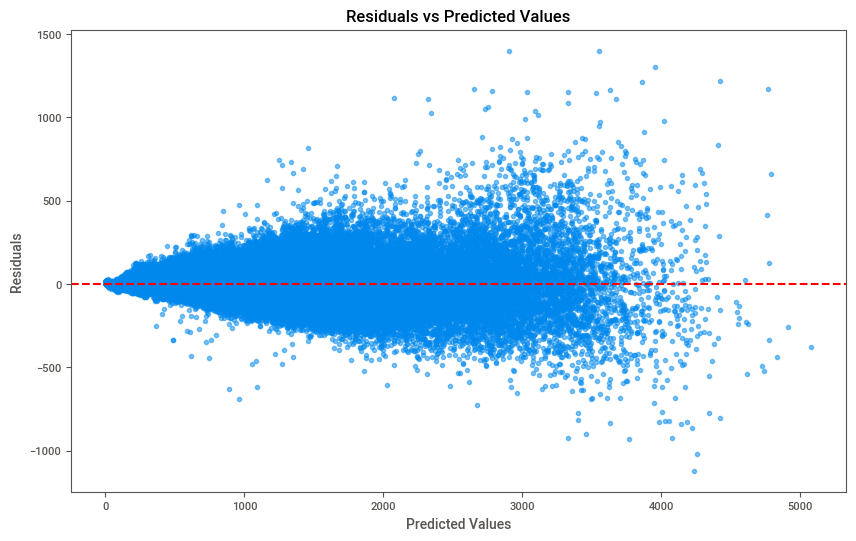

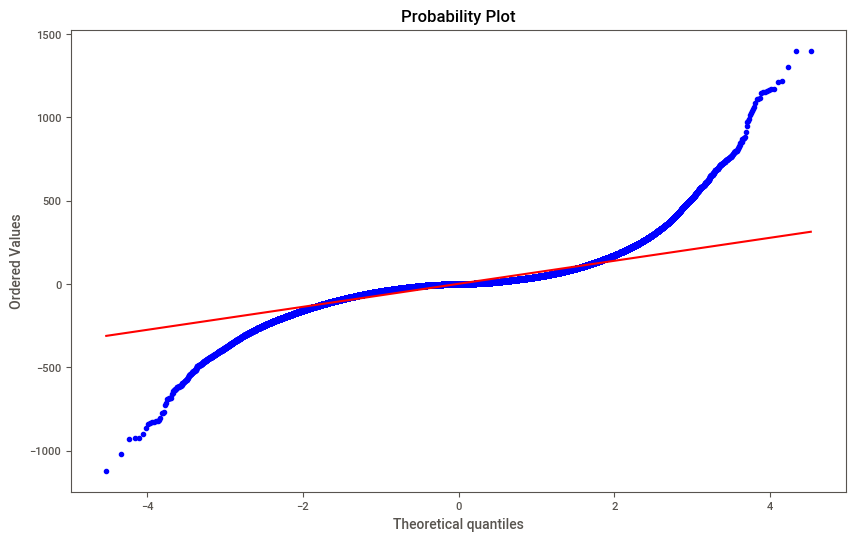

Top 10 positive coefficients:
                                     Feature  Coefficient
188                  gdp_ratio country_Kenya     0.893629
6                                  gdp_ratio     0.358220
12                            rolling_mean_7     0.309336
293             rolling_mean_7 country_Kenya     0.238209
21                            country_Norway     0.210987
189                 gdp_ratio country_Norway     0.205005
17                            country_Canada     0.199007
18                           country_Finland     0.192592
287   rolling_mean_7 store_Discount Stickers     0.178188
230  product_ratio product_Holographic Goose     0.156136

Top 10 negative coefficients:
                                      Feature  Coefficient
200                store_ratio rolling_mean_7    -0.134111
187                   gdp_ratio country_Italy    -0.171209
384  country_Kenya product_Kerneler Dark Mode    -0.182379
185                  gdp_ratio country_Canada    -0.183338
186   

In [41]:
# =========================================
# 1. LIBRARIES & CONFIGURATION
# =========================================
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from scipy import stats

warnings.filterwarnings("ignore", category=FutureWarning)

# For reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# =========================================
# 2. DATA LOADING
# =========================================
# Paths to the datasets (Adjust these paths)
TRAIN_PATH = "/kaggle/input/playground-series-s5e1/train.csv"
TEST_PATH = "/kaggle/input/playground-series-s5e1/test.csv"
GDP_PATH = "/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_ppp_per_capita.csv"
SUBMISSION_PATH = "/kaggle/input/playground-series-s5e1/sample_submission.csv"

# Load datasets
train_df = pd.read_csv(TRAIN_PATH, parse_dates=["date"])
test_df = pd.read_csv(TEST_PATH, parse_dates=["date"])
submission = pd.read_csv(SUBMISSION_PATH)
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# =========================================
# 3. PREPROCESSING & IMPUTING MISSING VALUES
# =========================================
# Read GDP per capita data
gdp_df = pd.read_csv(GDP_PATH)
years = [str(year) for year in range(2010, 2021)]  # 2010 to 2020 inclusive

# Filter relevant countries and years from GDP data
relevant_countries = train_df["country"].unique()
gdp_filtered = gdp_df[gdp_df["Country Name"].isin(relevant_countries)]
gdp_filtered = gdp_filtered[["Country Name"] + years]
gdp_filtered = gdp_filtered.melt(id_vars=["Country Name"], var_name="year", value_name="gdp_per_capita")
gdp_filtered.rename(columns={"Country Name": "country"}, inplace=True)
gdp_filtered['year'] = gdp_filtered['year'].astype(int)

# Calculate GDP ratios per year
gdp_total = gdp_filtered.groupby('year')['gdp_per_capita'].sum().reset_index().rename(columns={'gdp_per_capita': 'total_gdp'})
gdp_filtered = gdp_filtered.merge(gdp_total, on='year', how='left')
gdp_filtered['gdp_ratio'] = gdp_filtered['gdp_per_capita'] / gdp_filtered['total_gdp']
gdp_filtered.drop(columns=['gdp_per_capita', 'total_gdp'], inplace=True)

# Prepare train data for imputation
train_df['year'] = train_df['date'].dt.year
print(f"Missing values before imputation: {train_df['num_sold'].isna().sum()}")

# Merge train data with GDP ratios
train_df = train_df.merge(gdp_filtered, on=['country', 'year'], how='left')

# Impute missing values
# Calculate average num_sold per (date, store, product) in Norway
norway_avg = train_df[train_df['country'] == 'Norway'].groupby(['date', 'store', 'product'])['num_sold'].mean().reset_index()

# Merge Norway averages with missing entries
missing_mask = train_df['num_sold'].isna()
missing_entries = train_df[missing_mask].drop(columns=['num_sold'])
missing_entries = missing_entries.merge(norway_avg, on=['date', 'store', 'product'], how='left')

# Adjust num_sold using GDP ratios
norway_gdp_ratio = gdp_filtered[gdp_filtered['country'] == 'Norway'][['year', 'gdp_ratio']]
missing_entries = missing_entries.merge(norway_gdp_ratio, on='year', how='left', suffixes=('', '_norway'))

missing_entries['num_sold_imputed'] = missing_entries['num_sold'] * (missing_entries['gdp_ratio'] / missing_entries['gdp_ratio_norway'])

# Update original train_df
train_df.loc[missing_mask, 'num_sold'] = missing_entries['num_sold_imputed'].values

print(f"Missing values after imputation: {train_df['num_sold'].isna().sum()}")

# Handle any remaining missing values manually (if any)
remaining_missing = train_df[train_df['num_sold'].isna()]
if not remaining_missing.empty:
    # Assign specific values if necessary (Example IDs)
    train_df.loc[train_df["id"] == 23719, "num_sold"] = 4
    train_df.loc[train_df["id"] == 207003, "num_sold"] = 195
    print(f"Missing values after manual assignment: {train_df['num_sold'].isna().sum()}")

# =========================================
# 4. FEATURE ENGINEERING
# =========================================
# Add date features
for df in [train_df, test_df]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

# Merge GDP ratios with test data
test_df = test_df.merge(gdp_filtered[['country', 'year', 'gdp_ratio']], on=['country', 'year'], how='left')

# Handle missing GDP ratios in test data (if any)
test_df['gdp_ratio'].fillna(test_df['gdp_ratio'].mean(), inplace=True)

# Calculate store weights on the whole train data
store_weights = train_df.groupby("store")["num_sold"].sum() / train_df["num_sold"].sum()
store_weights = store_weights.reset_index().rename(columns={"num_sold": "store_ratio"})

# Add store ratios to train and test data
train_df = train_df.merge(store_weights, on='store', how='left')
test_df = test_df.merge(store_weights, on='store', how='left')

# Calculate average product ratios over all years
product_df = train_df.groupby(["date", "product"])["num_sold"].sum().reset_index()
product_pivot = product_df.pivot(index='date', columns='product', values='num_sold')
product_ratio = product_pivot.div(product_pivot.sum(axis=1), axis=0)
product_ratio = product_ratio.stack().reset_index().rename(columns={0: "product_ratio"})
product_ratio['month'] = product_ratio['date'].dt.month
product_ratio['day'] = product_ratio['date'].dt.day

# Calculate average product ratio per (month, day, product)
avg_product_ratio = product_ratio.groupby(['month', 'day', 'product'])['product_ratio'].mean().reset_index()

# Merge product ratios with train and test data
train_df = train_df.merge(avg_product_ratio, on=['month', 'day', 'product'], how='left')
test_df = test_df.merge(avg_product_ratio, on=['month', 'day', 'product'], how='left')

# Handle missing product_ratio by using overall average
overall_product_ratio = avg_product_ratio.groupby('product')['product_ratio'].mean().reset_index()
train_df = train_df.merge(overall_product_ratio, on='product', how='left', suffixes=('', '_overall'))
test_df = test_df.merge(overall_product_ratio, on='product', how='left', suffixes=('', '_overall'))

train_df['product_ratio'].fillna(train_df['product_ratio_overall'], inplace=True)
test_df['product_ratio'].fillna(test_df['product_ratio_overall'], inplace=True)

# Drop the 'product_ratio_overall' columns
train_df.drop(columns=['product_ratio_overall'], inplace=True)
test_df.drop(columns=['product_ratio_overall'], inplace=True)

# Adjust for day of week effects
# Calculate average num_sold per day of week
day_of_week_avg = train_df.groupby("day_of_week")['num_sold'].mean().reset_index()
overall_avg = train_df['num_sold'].mean()
day_of_week_avg['day_of_week_ratio'] = day_of_week_avg['num_sold'] / overall_avg

# Merge day_of_week_ratio with train and test data
train_df = train_df.merge(day_of_week_avg[['day_of_week', 'day_of_week_ratio']], on='day_of_week', how='left')
test_df = test_df.merge(day_of_week_avg[['day_of_week', 'day_of_week_ratio']], on='day_of_week', how='left')

# Create holiday indicator (example for Christmas)
holidays = pd.to_datetime(['2010-12-25', '2011-12-25', '2012-12-25', '2013-12-25', 
                           '2014-12-25', '2015-12-25', '2016-12-25', '2017-12-25', 
                           '2018-12-25', '2019-12-25', '2020-12-25'])

train_df['is_holiday'] = train_df['date'].isin(holidays).astype(int)
test_df['is_holiday'] = test_df['date'].isin(holidays).astype(int)

# Create lag features
train_df_sorted = train_df.sort_values('date')
train_df['num_sold_lag_1'] = train_df_sorted.groupby(['store', 'product'])['num_sold'].shift(1)
train_df['num_sold_lag_7'] = train_df_sorted.groupby(['store', 'product'])['num_sold'].shift(7)

# Handle missing values in lag features
train_df['num_sold_lag_1'].fillna(method='bfill', inplace=True)
train_df['num_sold_lag_7'].fillna(method='bfill', inplace=True)

# Rolling mean and std features
train_df['rolling_mean_7'] = train_df_sorted.groupby(['store', 'product'])['num_sold'].transform(lambda x: x.shift(1).rolling(window=7).mean())
train_df['rolling_std_7'] = train_df_sorted.groupby(['store', 'product'])['num_sold'].transform(lambda x: x.shift(1).rolling(window=7).std())

# Handle missing values in rolling statistics
train_df['rolling_mean_7'].fillna(train_df['num_sold'].mean(), inplace=True)
train_df['rolling_std_7'].fillna(train_df['num_sold'].std(), inplace=True)

# Since we cannot create lag features for test data (num_sold is not available), we can set them to the mean values
test_df['num_sold_lag_1'] = train_df['num_sold'].mean()
test_df['num_sold_lag_7'] = train_df['num_sold'].mean()
test_df['rolling_mean_7'] = train_df['num_sold'].mean()
test_df['rolling_std_7'] = train_df['num_sold'].std()

# =========================================
# 5. DATA PREPARATION FOR MODELING
# =========================================
# Select features and target variable
numerical_features = ['year', 'month', 'day', 'day_of_week', 'quarter', 'is_weekend',
                      'gdp_ratio', 'store_ratio', 'product_ratio', 'day_of_week_ratio',
                      'num_sold_lag_1', 'num_sold_lag_7', 'rolling_mean_7', 'rolling_std_7']
categorical_features = ['store', 'country', 'product']
target = 'num_sold'

X_train = train_df[numerical_features + categorical_features]
y_train = train_df[target]
X_test = test_df[numerical_features + categorical_features]

# Log1p transform the target variable to handle zero values and skewness
y_train_transformed = np.log1p(y_train)

# Convert categorical features to string type (necessary for OneHotEncoder)
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Handle categorical variables and scaling using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Polynomial features and interactions
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', poly)
])

# Transform data
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# =========================================
# 6. MODEL TRAINING WITH RIDGE REGRESSION
# =========================================
# Initialize the Ridge regression model
ridge = Ridge(random_state=RANDOM_SEED)

# Use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

param_grid = {'alpha': np.logspace(-4, 4, 20)}

grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_transformed, y_train_transformed)

print("Best alpha:", grid_search.best_params_['alpha'])

# Use the best estimator
best_ridge = grid_search.best_estimator_

# =========================================
# 7. MODEL EVALUATION
# =========================================
# Predict on training data
y_train_pred_transformed = best_ridge.predict(X_train_transformed)
y_train_pred = np.expm1(y_train_pred_transformed)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Training RMSE:", train_rmse)

# =========================================
# 8. PREDICTION
# =========================================
# Predict on the test data
y_pred_transformed = best_ridge.predict(X_test_transformed)

# Inverse transform the predictions
y_pred = np.expm1(y_pred_transformed)  # exp(x) - 1

# Ensure predictions are non-negative
y_pred = np.clip(y_pred, a_min=0, a_max=None)

# Round predictions to integers
y_pred = np.round(y_pred).astype(int)

# Assign predictions to test_df
test_df['num_sold'] = y_pred

# =========================================
# 9. SUBMISSION GENERATION
# =========================================
submission['num_sold'] = test_df['num_sold'].values
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
submission.to_csv(f"sub_m15_{timestamp}.csv", index=False)
print("Submission saved!")

# =========================================
# 10. RESIDUAL ANALYSIS
# =========================================
# Residuals on training data
residuals = y_train - y_train_pred

plt.figure(figsize=(10,6))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Checking normality of residuals
plt.figure(figsize=(10,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

# =========================================
# 11. FEATURE IMPORTANCE (COEFFICIENTS)
# =========================================
# Retrieve feature names after transformation
feature_names_num = preprocessor.named_transformers_['num'].get_feature_names_out(numerical_features)
feature_names_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names_poly = poly.get_feature_names_out(input_features=np.concatenate((feature_names_num, feature_names_cat)))

# Combine coefficients and feature names
coefficients = best_ridge.coef_
coef_df = pd.DataFrame({'Feature': feature_names_poly, 'Coefficient': coefficients})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)

print("Top 10 positive coefficients:")
print(coef_df.head(10))

print("\nTop 10 negative coefficients:")
print(coef_df.tail(10))

# =========================================
# 12. SAVE MODEL FOR FUTURE USE (OPTIONAL)
# =========================================
import joblib

# Save the trained model
joblib.dump(best_ridge, 'ridge_model.pkl')
# Save the pipeline
joblib.dump(pipeline, 'preprocessing_pipeline.pkl')
print("Model and pipeline saved!")

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Experiment tracking 📊</div>

In [42]:
!mkdir /kaggle/working/sub
!cp /kaggle/input/ps-s5-e01-wg/sub* /kaggle/working/sub/

In [43]:
import os
import pandas as pd
from IPython.display import display
from datetime import datetime

# Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly
import plotly.express as px

In [44]:
class ExperimentTracker:
    def __init__(self, csv_path='experiment_log.csv'):
        """
        Initialize the ExperimentTracker.
        
        Parameters:
        - csv_path (str): Path to the CSV file for saving/loading the experiment log.
        """
        self.csv_path = csv_path
        self.columns = ["Experiment", "Date", "CV Score", "LB Score", "Notebook", "Parameters", "Comment"]
        self.experiment_log = self.load_log()
    
    def load_log(self):
        """
        Load the experiment log from a CSV file. If the file doesn't exist,
        initialize an empty DataFrame.
        
        Returns:
        - pd.DataFrame: The experiment log DataFrame.
        """
        if os.path.exists(self.csv_path):
            df = pd.read_csv(self.csv_path)
            # Ensure the columns are as expected
            missing_cols = set(self.columns) - set(df.columns)
            for col in missing_cols:
                df[col] = None
            # Reorder columns to maintain consistency
            df = df[self.columns]
            return df
        else:
            # Initialize with empty DataFrame
            return pd.DataFrame(columns=self.columns)
    
    def save_log(self):
        """
        Save the current experiment log to a CSV file.
        """
        self.experiment_log.to_csv(self.csv_path, index=False)
        print(f"Experiment log saved to '{self.csv_path}'.")
    
    def add_experiment(self, experiment, date, cv_score, lb_score, notebook, parameters, comment):
        """
        Add a new experiment to the log and return the current experiment's data.
        
        Parameters:
        - experiment (str): Unique identifier for the experiment.
        - date (str or pd.Timestamp): Date of the experiment.
        - cv_score (float): Cross-Validation score.
        - lb_score (float): Leaderboard score.
        - notebook (str): Reference to the notebook or script.
        - parameters (str): Description of parameters used.
        - comment (str): Additional comments.
        
        Returns:
        - pd.DataFrame: DataFrame containing only the current experiment's data
        """
        new_entry = pd.DataFrame([{
            "Experiment": experiment,
            "Date": pd.to_datetime(date).date(),
            "CV Score": cv_score,
            "LB Score": lb_score,
            "Notebook": notebook,
            "Parameters": parameters,
            "Comment": comment
        }])
        
        self.experiment_log = pd.concat([self.experiment_log, new_entry], ignore_index=True)
        print(f"Added experiment '{experiment}'.")
        return new_entry
    
    def get_experiments(self):
        """
        Return the complete experiment log DataFrame.
        
        Returns:
        - pd.DataFrame: The complete experiment log
        """
        return self.experiment_log.copy()
    
    def display_log(self, df=None, font_size=16):
        """
        Display the experiment log with enhanced styling and sorted by LB-score in ascending order.
        
        Parameters:
        - df (pd.DataFrame, optional): Specific DataFrame to display. If None, displays complete log.
        - font_size (int): Font size for the table.
        """
        display_df = df if df is not None else self.experiment_log
        
        if display_df.empty:
            print("Experiment log is empty.")
            return
        
        # Sort by LB-score if the column exists
        if 'LB Score' in display_df.columns:
            display_df = display_df.sort_values(by='LB Score', ascending=True)
        else:
            print("Warning: 'LB Score' column not found. Displaying unsorted DataFrame.")
        
        styled = display_df.style.set_properties(**{
            'font-size': f'{font_size}px',
            'text-align': 'center'
        }).set_table_styles([
            {'selector': 'th', 'props': [('font-size', f'{font_size}px'), 
                                         ('text-align', 'center'), 
                                         ('background-color', '#f2f2f2')]},
            {'selector': 'td', 'props': [('border', '1px solid black')]}
        ]).set_table_attributes('style="border-collapse: collapse; width: 100%;"')
        
        display(styled)
    
    def display_interactive_log(self, df=None):
        """
        Display an interactive experiment log using qgrid.
        
        Parameters:
        - df (pd.DataFrame, optional): Specific DataFrame to display. If None, displays complete log.
        """
        display_df = df if df is not None else self.experiment_log
        
        if display_df.empty:
            print("Experiment log is empty.")
            return
        
        qgrid_widget = qgrid.show_grid(display_df, show_toolbar=True)
        display(qgrid_widget)

    def plot_cv_vs_lb_scores(self, df=None, engine='seaborn'):
        """
        Plot Cross-Validation (CV) Scores vs Leaderboard (LB) Scores grouped by Experiment.
        Choose either 'plotly' or 'seaborn' as the plotting engine.
        
        Parameters:
        - df (pd.DataFrame, optional): Specific DataFrame to plot. If None, plots complete log.
        - engine (str, optional): Plotting engine. Either 'plotly' or 'seaborn'. Default is 'plotly'.
        """
        df_plot = df if df is not None else self.experiment_log.copy()
        
        if df_plot.empty:
            print("No data to plot.")
            return
        
        required_columns = ['Experiment', 'CV Score', 'LB Score']
        for col in required_columns:
            if col not in df_plot.columns:
                print(f"Missing required column: {col}")
                return
        
        df_plot['Experiment'] = df_plot['Experiment'].astype('category')
        
        # -- Plot with Plotly --
        if engine.lower() == 'plotly':
            fig = px.scatter(
                df_plot,
                x='CV Score',
                y='LB Score',
                color='Experiment',
                symbol='Experiment',
                hover_data=['Experiment', 'Comment', 'Parameters'],
                title='CV Scores vs. LB Scores',
                labels={'CV Score': 'Cross-Validation Score', 'LB Score': 'Public Leaderboard Score'},
                size_max=12
            )
            
            fig.update_layout(
                title={'x': 0.5},
                legend_title='Experiment',
                template='plotly_white',
                height=600,
                width=900
            )
            
            fig.show()
        
        # -- Plot with Seaborn --
        elif engine.lower() == 'seaborn':
            sns.set_style("whitegrid")
            plt.figure(figsize=(12, 8))
            
            scatter_plot = sns.scatterplot(
                data=df_plot,
                x='CV Score',
                y='LB Score',
                hue='Experiment',
                palette='tab10',
                s=100,
                edgecolor='w',
                alpha=0.7
            )
            
            plt.title('CV Scores vs. LB Scores', fontsize=18)
            plt.xlabel('Cross-Validation Score', fontsize=14)
            plt.ylabel('Public Leaderboard Score', fontsize=14)
            
            # Adjust the legend
            plt.legend(title='Experiment', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
            plt.tight_layout()
            plt.show()
        
        else:
            print(f"Invalid engine '{engine}'. Please choose 'plotly' or 'seaborn'.")


Added experiment 'model_01_20250101_130821'.
Added experiment 'model_01_20250101_161728'.
Added experiment 'model_02_20250101_161848'.
Added experiment 'model_03_20250101_165958'.
Added experiment 'model_04_20250102_113732'.
Added experiment 'model_04_20250102_151250'.
Added experiment 'model_05_20250102_145256'.
Added experiment 'model_06_20250102_190342'.
Added experiment 'model_07_20250102_214658'.
Added experiment 'model_08'.
Added experiment 'model_13_2025-01-07_18-31-11'.
Added experiment 'model_m13_2025-01-07_22-29-07'.
Experiment log saved to 'experiment_log_250110_2051.csv'.


,Experiment,Date,CV Score,LB Score,Notebook,Parameters,Comment
10,model_13_2025-01-07_18-31-11,2025-01-07,nan,0.056630,Stickler for stickers!,no model,no model basline modified from public notebook
11,model_m13_2025-01-07_22-29-07,2025-01-07,nan,0.100850,Stickler for stickers!,no model,no model basline modified from public notebook
0,model_01_20250101_130821,2025-01-01,0.094670,0.125360,Stickler for stickers!,RF,Simple baseline model
1,model_01_20250101_161728,2025-01-01,0.091020,0.125360,Stickler for stickers!,RF,Simple baseline model
3,model_03_20250101_165958,2025-01-01,0.094550,0.135440,Stickler for stickers!,XGB,Simple baseline model
5,model_04_20250102_151250,2025-01-02,0.097610,0.143840,Stickler for stickers!,XGB,XGB with holidays and random search
8,model_07_20250102_214658,2025-01-02,0.079330,0.147110,LGBM+Holidays+Fitter,LGBM,LGBM modified from public notebook
4,model_04_20250102_113732,2025-01-02,0.120890,0.157420,Stickler for stickers!,XGB,XGB with holidays and random search
7,model_06_20250102_190342,2025-01-02,0.128030,0.205890,Stickler for stickers!,LGBM,simple LGBM baseline
6,model_05_20250102_145256,2025-01-02,0.091970,0.622330,PS-S5.E01 | Autogluon,Autogluon,Autogluon regression



Plotting valid experiments (excluding null LB scores and high CV scores):


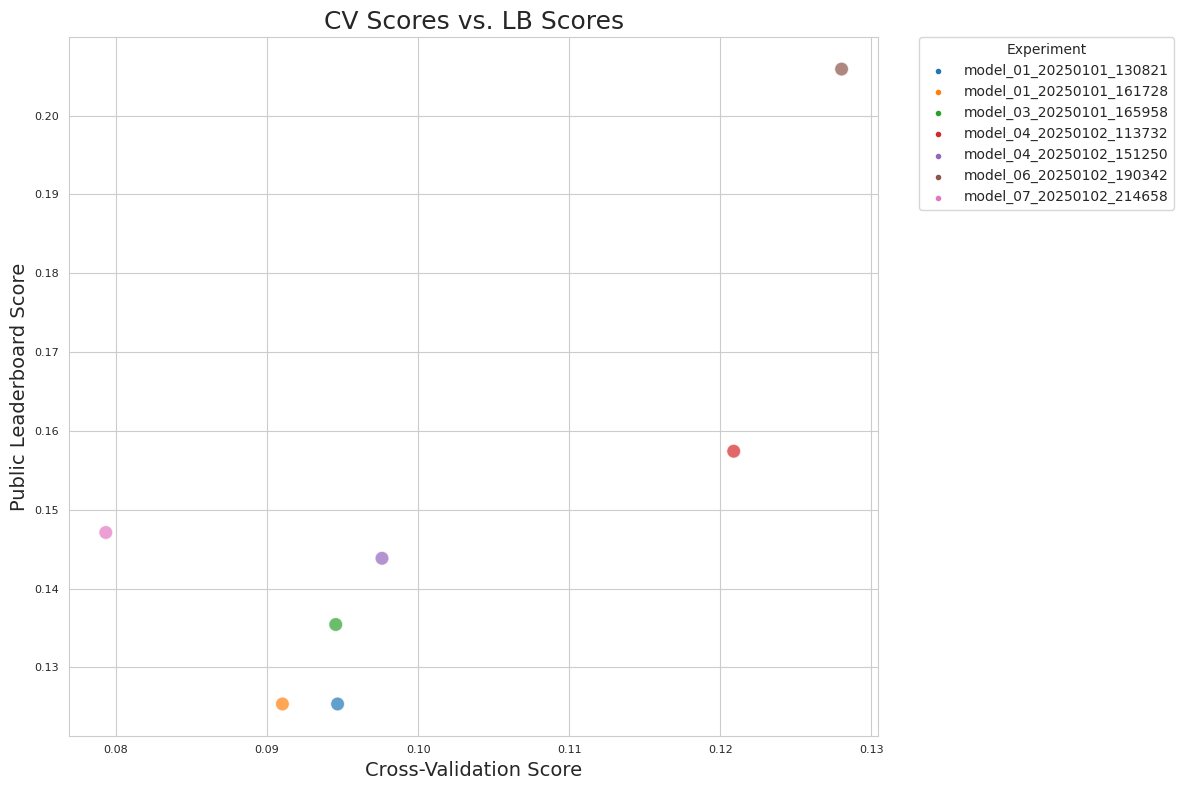


XGB Experiments:


,Experiment,Date,CV Score,LB Score,Notebook,Parameters,Comment
3,model_03_20250101_165958,2025-01-01,0.094550,0.135440,Stickler for stickers!,XGB,Simple baseline model
5,model_04_20250102_151250,2025-01-02,0.097610,0.143840,Stickler for stickers!,XGB,XGB with holidays and random search
4,model_04_20250102_113732,2025-01-02,0.120890,0.157420,Stickler for stickers!,XGB,XGB with holidays and random search



LGB Experiments:


,Experiment,Date,CV Score,LB Score,Notebook,Parameters,Comment
8,model_07_20250102_214658,2025-01-02,0.079330,0.147110,LGBM+Holidays+Fitter,LGBM,LGBM modified from public notebook
7,model_06_20250102_190342,2025-01-02,0.128030,0.205890,Stickler for stickers!,LGBM,simple LGBM baseline
9,model_08,2025-01-03,0.086220,nan,LGBM+Holidays,LGBM,LGBM modified from public notebook


In [45]:
# Initialize tracker with timestamp in filename
timestamp = datetime.now().strftime('%y%m%d_%H%M')
tracker = ExperimentTracker(csv_path=f'experiment_log_{timestamp}.csv')

# Add experiments and collect their DataFrames
experiments = [
    {
        "experiment": "model_01_20250101_130821",
        "date": "2025-01-01",
        "cv_score": 0.09467,
        "lb_score": 0.12536,
        "notebook": "Stickler for stickers!",
        "parameters": "RF",
        "comment": "Simple baseline model"
    },
    {
        "experiment": "model_01_20250101_161728",
        "date": "2025-01-01",
        "cv_score": 0.09102,
        "lb_score": 0.12536,
        "notebook": "Stickler for stickers!",
        "parameters": "RF",
        "comment": "Simple baseline model"
    },
    {
        "experiment": "model_02_20250101_161848",
        "date": "2025-01-01",
        "cv_score": 4.39350,
        "lb_score": 8.58667,
        "notebook": "Stickler for stickers!",
        "parameters": "LR",
        "comment": "Simple baseline model"
    },
    {
        "experiment": "model_03_20250101_165958",
        "date": "2025-01-01",
        "cv_score": 0.09455,
        "lb_score": 0.13544,
        "notebook": "Stickler for stickers!",
        "parameters": "XGB",
        "comment": "Simple baseline model"
    },
    {
        "experiment": "model_04_20250102_113732",
        "date": "2025-01-02",
        "cv_score": 0.12089,
        "lb_score": 0.15742,
        "notebook": "Stickler for stickers!",
        "parameters": "XGB",
        "comment": "XGB with holidays and random search"
    },
    {
        "experiment": "model_04_20250102_151250",
        "date": "2025-01-02",
        "cv_score": 0.09761,
        "lb_score": 0.14384,
        "notebook": "Stickler for stickers!",
        "parameters": "XGB",
        "comment": "XGB with holidays and random search"
    },
    {
        "experiment": "model_05_20250102_145256",
        "date": "2025-01-02",
        "cv_score": 0.09197,
        "lb_score": 0.62233,
        "notebook": "PS-S5.E01 | Autogluon",
        "parameters": "Autogluon",
        "comment": "Autogluon regression"
    },
    {
        "experiment": "model_06_20250102_190342",
        "date": "2025-01-02",
        "cv_score": 0.12803,
        "lb_score": 0.20589,
        "notebook": "Stickler for stickers!",
        "parameters": "LGBM",
        "comment": "simple LGBM baseline"
    },
    {
        "experiment": "model_07_20250102_214658",
        "date": "2025-01-02",
        "cv_score": 0.07933,
        "lb_score":  0.14711,
        "notebook": "LGBM+Holidays+Fitter",
        "parameters": "LGBM",
        "comment": "LGBM modified from public notebook"
    },
    {
        "experiment": "model_08",
        "date": "2025-01-03",
        "cv_score":0.08622,
        "lb_score":None,
        "notebook": "LGBM+Holidays",
        "parameters": "LGBM",
        "comment": "LGBM modified from public notebook"
    },
    {
        "experiment": "model_13_2025-01-07_18-31-11",
        "date": "2025-01-07",
        "cv_score":None,
        "lb_score":0.05663,
        "notebook": "Stickler for stickers!",
        "parameters": "no model",
        "comment": "no model basline modified from public notebook"
    },
    {
        "experiment": "model_m13_2025-01-07_22-29-07",
        "date": "2025-01-07",
        "cv_score":None,
        "lb_score":0.10085,
        "notebook": "Stickler for stickers!",
        "parameters": "no model",
        "comment": "no model basline modified from public notebook"
    }
]

# Add all experiments
for exp in experiments:
    tracker.add_experiment(**exp)

# Save the log
tracker.save_log()

# Get all experiments
all_experiments = tracker.get_experiments()

tracker.display_log(df=all_experiments, font_size=12)

# Filter out experiments with None/null LB scores and high CV scores
valid_experiments = all_experiments[
    (all_experiments['LB Score'].notna()) & 
    (all_experiments['CV Score'] < 0.3)  & # Filter out unusually high CV scores
    (all_experiments['LB Score'] < 0.3) # Filter out unusually high LB scores
].copy()  # Create a copy to avoid the SettingWithCopyWarning

# Plot only valid experiments
print("\nPlotting valid experiments (excluding null LB scores and high CV scores):")
tracker.plot_cv_vs_lb_scores(df=valid_experiments)

# Filter by model type (note the uppercase 'Parameters')
xgb_experiments = all_experiments[all_experiments['Parameters'] == 'XGB']
print("\nXGB Experiments:")
tracker.display_log(df=xgb_experiments, font_size=12)

# Filter by model type (note the uppercase 'Parameters')
xgb_experiments = all_experiments[all_experiments['Parameters'] == 'LGBM']
print("\nLGB Experiments:")
tracker.display_log(df=xgb_experiments, font_size=12)